Reading data

In [279]:
import pandas as pd, numpy as np,matplotlib.pyplot as plt, seaborn as sns

In [280]:
raw_data=pd.read_csv(r"telecom_churn_data.csv")
# raw_data=pd.read_csv(r"D:\Churn Data\Churn-\telecom_churn_data.csv")
raw_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

dropping 'mobile_number ' & 'circle_id'

In [281]:
raw_data.shape

(99999, 226)

In [282]:
data=raw_data.copy()

In [283]:
data.drop(columns=['mobile_number', 'circle_id'],  inplace=True)

In [284]:
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

In [285]:

data.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=224)

creating churn columns 

In [286]:
for i in ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']:
    print(f'for {i} null % is ',data[i].isna().sum())

for total_ic_mou_9 null % is  0
for total_og_mou_9 null % is  0
for vol_2g_mb_9 null % is  0
for vol_3g_mb_9 null % is  0


In [287]:
data[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
1,188.04,72.11,0.00,0.00
2,517.74,124.94,0.00,8.42
3,305.38,362.54,0.00,0.00
4,205.31,104.59,0.00,0.00
...,...,...,...,...
99994,154.43,27.14,0.00,0.00
99995,108.84,106.41,0.00,0.00
99996,0.00,0.00,0.00,0.00
99997,2.21,0.00,85.67,4177.14


In [288]:
data['churn']=((data['total_ic_mou_9']+data['total_og_mou_9']+data['vol_3g_mb_9']+data['vol_2g_mb_9'])==0).astype('int')
# data.drop(columns=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9'], inplace=True)
data.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8',
       ...
       'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'churn'],
      dtype='object', length=225)

as we have to predict on churm month i.e month 9 
so segrating month 9 data togrther i.e. TEST data

In [289]:
col=data.columns.to_list()
churn_col=[i for i in col if i.endswith('9')]
data[churn_col].isna().sum()/data.shape[0]


last_date_of_month_9        0.016590
arpu_9                      0.000000
onnet_mou_9                 0.077451
offnet_mou_9                0.077451
roam_ic_mou_9               0.077451
roam_og_mou_9               0.077451
loc_og_t2t_mou_9            0.077451
loc_og_t2m_mou_9            0.077451
loc_og_t2f_mou_9            0.077451
loc_og_t2c_mou_9            0.077451
loc_og_mou_9                0.077451
std_og_t2t_mou_9            0.077451
std_og_t2m_mou_9            0.077451
std_og_t2f_mou_9            0.077451
std_og_t2c_mou_9            0.077451
std_og_mou_9                0.077451
isd_og_mou_9                0.077451
spl_og_mou_9                0.077451
og_others_9                 0.077451
total_og_mou_9              0.000000
loc_ic_t2t_mou_9            0.077451
loc_ic_t2m_mou_9            0.077451
loc_ic_t2f_mou_9            0.077451
loc_ic_mou_9                0.077451
std_ic_t2t_mou_9            0.077451
std_ic_t2m_mou_9            0.077451
std_ic_t2f_mou_9            0.077451
s

In [290]:
selcted=[i for i in data.columns if (data[i].dtype== 'int' or data[i].dtype== 'float') and data[i].max()<=1 ]
data[selcted].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,churn
count,98981.0,98981.0,98981.0,96062.0,96140.0,94621.0,92254.0,96062.0,96140.0,94621.0,92254.0,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025086,0.023034,0.020844,0.015971,0.914404,0.908764,0.890808,0.860968,0.101911
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.156391,0.150014,0.142863,0.125366,0.279772,0.287950,0.311885,0.345987,0.302533
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


droping columns such as 'loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,
std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_7, std_ic_t2o_mou_7, std_ic_t2o_mou_8, std_ic_t2o_mou_9
' as maximum value in these is zero 0 and rest missing

In [291]:
data.drop(columns=['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9'],inplace=True)
churn_col.remove('std_og_t2c_mou_9')
churn_col.remove('std_ic_t2o_mou_9')


In [292]:
# Updating the list of columns


In [293]:
selcted= [i for i in selcted if i not in ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9']]
selcted

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9',
 'churn']

In [294]:
data.columns.nunique()

214

In [295]:
data[selcted].describe()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,churn
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000
mean,0.025086,0.023034,0.020844,0.015971,0.914404,0.908764,0.890808,0.860968,0.101911
std,0.156391,0.150014,0.142863,0.125366,0.279772,0.287950,0.311885,0.345987,0.302533
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [296]:
# Print missing data percentage before filling NaN
print(f'Missing data % in feature\n', data[selcted].isna().sum() / data[selcted].shape[0])

# Fill missing values with 0



Missing data % in feature
 night_pck_user_6    0.748467
night_pck_user_7    0.744287
night_pck_user_8    0.736607
night_pck_user_9    0.740777
fb_user_6           0.748467
fb_user_7           0.744287
fb_user_8           0.736607
fb_user_9           0.740777
churn               0.000000
dtype: float64


In [297]:
for i in selcted:
    data[i].fillna(0, inplace=True)

# Print missing data percentage after filling NaN


In [298]:
print(f'Missing data % in feature post filling NaN\n', data[selcted].isna().sum() / data[selcted].shape[0])

Missing data % in feature post filling NaN
 night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
churn               0.0
dtype: float64


In [299]:
data.shape[1]

214

In [300]:
numerrical_col=data.columns.difference(selcted)

In [301]:
data[numerrical_col].describe()

,aon,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_6,arpu_7,arpu_8,arpu_9,aug_vbc_3g,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,jul_vbc_3g,jun_vbc_3g,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,sep_vbc_3g,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9
count,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.00000,99999.000000,99999.000000,99999.000000,99999.000000,99999.

In [302]:
for i in numerrical_col:
    if data[i].isna().sum()/data.shape[0]>0.4:
        print(i,data[i].isna().sum()/data.shape[0])
        data[i].fillna(0,inplace=True)
# it miight be possible that people didn't use Internet/recharge/ so we can't drop there columns
# imputing missing values with 0


arpu_2g_6 0.7484674846748467
arpu_2g_7 0.7442874428744287
arpu_2g_8 0.7366073660736607
arpu_2g_9 0.7407774077740777
arpu_3g_6 0.7484674846748467
arpu_3g_7 0.7442874428744287
arpu_3g_8 0.7366073660736607
arpu_3g_9 0.7407774077740777
av_rech_amt_data_6 0.7484674846748467
av_rech_amt_data_7 0.7442874428744287
av_rech_amt_data_8 0.7366073660736607
av_rech_amt_data_9 0.7407774077740777
count_rech_2g_6 0.7484674846748467
count_rech_2g_7 0.7442874428744287
count_rech_2g_8 0.7366073660736607
count_rech_2g_9 0.7407774077740777
count_rech_3g_6 0.7484674846748467
count_rech_3g_7 0.7442874428744287
count_rech_3g_8 0.7366073660736607
count_rech_3g_9 0.7407774077740777
date_of_last_rech_data_6 0.7484674846748467
date_of_last_rech_data_7 0.7442874428744287
date_of_last_rech_data_8 0.7366073660736607
date_of_last_rech_data_9 0.7407774077740777
max_rech_data_6 0.7484674846748467
max_rech_data_7 0.7442874428744287
max_rech_data_8 0.7366073660736607
max_rech_data_9 0.7407774077740777
total_rech_data_6 0.

In [303]:
date_col=data.columns.str.contains('date')
data.columns[date_col]

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [304]:
['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9']
#  dropping these columns as last date of month have same data in it and for last recharge date it has more than 70 % data ,missing
data.drop(columns=data.columns[date_col], inplace=True)
churn_col.remove('date_of_last_rech_data_9')
churn_col.remove('date_of_last_rech_9')
churn_col.remove('last_date_of_month_9')



In [305]:
for i in data.columns:
    print(i,data[i].isna().sum()/data.shape[0])

arpu_6 0.0
arpu_7 0.0
arpu_8 0.0
arpu_9 0.0
onnet_mou_6 0.03937039370393704
onnet_mou_7 0.03859038590385904
onnet_mou_8 0.05378053780537805
onnet_mou_9 0.07745077450774508
offnet_mou_6 0.03937039370393704
offnet_mou_7 0.03859038590385904
offnet_mou_8 0.05378053780537805
offnet_mou_9 0.07745077450774508
roam_ic_mou_6 0.03937039370393704
roam_ic_mou_7 0.03859038590385904
roam_ic_mou_8 0.05378053780537805
roam_ic_mou_9 0.07745077450774508
roam_og_mou_6 0.03937039370393704
roam_og_mou_7 0.03859038590385904
roam_og_mou_8 0.05378053780537805
roam_og_mou_9 0.07745077450774508
loc_og_t2t_mou_6 0.03937039370393704
loc_og_t2t_mou_7 0.03859038590385904
loc_og_t2t_mou_8 0.05378053780537805
loc_og_t2t_mou_9 0.07745077450774508
loc_og_t2m_mou_6 0.03937039370393704
loc_og_t2m_mou_7 0.03859038590385904
loc_og_t2m_mou_8 0.05378053780537805
loc_og_t2m_mou_9 0.07745077450774508
loc_og_t2f_mou_6 0.03937039370393704
loc_og_t2f_mou_7 0.03859038590385904
loc_og_t2f_mou_8 0.05378053780537805
loc_og_t2f_mou_9 

focusiing only on Missing columns

In [306]:
num_col=[i for i in data.columns if data[i].isna().sum()/data.shape[0]>0]

In [307]:
len(num_col)


108

In [308]:
for i in num_col:
    print(i, data[i].isna().sum()/data.shape[0])

onnet_mou_6 0.03937039370393704
onnet_mou_7 0.03859038590385904
onnet_mou_8 0.05378053780537805
onnet_mou_9 0.07745077450774508
offnet_mou_6 0.03937039370393704
offnet_mou_7 0.03859038590385904
offnet_mou_8 0.05378053780537805
offnet_mou_9 0.07745077450774508
roam_ic_mou_6 0.03937039370393704
roam_ic_mou_7 0.03859038590385904
roam_ic_mou_8 0.05378053780537805
roam_ic_mou_9 0.07745077450774508
roam_og_mou_6 0.03937039370393704
roam_og_mou_7 0.03859038590385904
roam_og_mou_8 0.05378053780537805
roam_og_mou_9 0.07745077450774508
loc_og_t2t_mou_6 0.03937039370393704
loc_og_t2t_mou_7 0.03859038590385904
loc_og_t2t_mou_8 0.05378053780537805
loc_og_t2t_mou_9 0.07745077450774508
loc_og_t2m_mou_6 0.03937039370393704
loc_og_t2m_mou_7 0.03859038590385904
loc_og_t2m_mou_8 0.05378053780537805
loc_og_t2m_mou_9 0.07745077450774508
loc_og_t2f_mou_6 0.03937039370393704
loc_og_t2f_mou_7 0.03859038590385904
loc_og_t2f_mou_8 0.05378053780537805
loc_og_t2f_mou_9 0.07745077450774508
loc_og_t2c_mou_6 0.03937

In [309]:
data[num_col].describe(percentiles=[.90,.95,.99])

,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9
count,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000
mean,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803,190.337222,9.950013,7.149898,7.292981,6.343841,13.911337,9.818732,9.971890,8.555519,47.100763,46.473010,45.887806,44.584446,93.342088,91.397131,91.755128,90.463192,3.751013,3.792985,3.677991,3.655123,1.123056,1.368500,1.433821,1.232726,144.201175,141.670476,141.328209,138.709970,79.829870,83.299598,83.282673,82.342919,87.299624,90.804137,89.838390,86.276622,1.129011,1.115010,1.067792,1.042362,168.261218,175.221436,174.191498,169.664466,0.798277,0.776572,0.791247,0.723892,3.916811,4.978279,5.053769,4.412767,0.454157,0.030235,0.033372,0.047456,47.922365,47.990520,47.211362,46.281794,107.475650,107.120493,108.460515,106.155471,12.084305,12.599697,11.751834,12.173105,167.491059,167.719540,167.432575,164.619293,9.575993,10.011904,9.883921,9.432479,20.722240,21.656415,21.183211,19.620913,2.156397,2.216923,2.085004,2.173419,32.457179,33.887833,33.154735,31.229344,0.061557,0.033585,0.040361,0.1

In [310]:
# It might be possibel that people didn't rechrged  thier phn 
data[['count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9']]
data.fillna(0, inplace=True)

In [311]:
# as theer is a huge difference between mean nd median tere are outliers in the data
# impoting median
for i in num_col:
    
    if data[i].dtype=='int' or data[i].dtype=='float':
        data[i].fillna(0, inplace=True)

In [312]:
data.describe()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.00000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000

In [313]:
churn_data=data[churn_col]
data.drop(columns=churn_col, inplace=True)
churn_data

,arpu_9,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_mou_9,isd_og_mou_9,spl_og_mou_9,og_others_9,total_og_mou_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_mou_9,total_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9,total_rech_num_9,total_rech_amt_9,max_rech_amt_9,last_day_rch_amt_9,total_rech_data_9,max_rech_data_9,count_rech_2g_9,count_rech_3g_9,av_rech_amt_data_9,vol_2g_mb_9,vol_3g_mb_9,arpu_3g_9,arpu_2g_9,night_pck_user_9,monthly_2g_9,sachet_2g_9,monthly_3g_9,sachet_3g_9,fb_user_9
0,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0
1,86.285,18.34,53.76,0.00,0.00,18.34,53.76,0.00,0.00,72.11,0.00,0.00,0.0,0.00,0.0,0.00,0.0,72.11,116.09,56.93,0.00,173.03,0.00,15.01,0.00,15.01,188.04,0.00,0.00,0.00,5,121,50,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0
2,290.714,74.81,118.91,38.49,70.94,14.39,28.16,22.24,0.48,64.81,8.76,9.28,0.0,18.04,0.0,42.08,0.0,124.94,148.23,38.98,158.19,345.41,49.44,118.18,3.86,171.49,517.74,0.45,0.01,0.36,7,358,100,0,1.0,46.0,1.0,0.0,46.0,0.00,8.42,2.84,0.00,0.0,0,1,0,0,1.0
3,389.500,241.71,113.54,0.00,0.00,15.49,65.46,2.06,0.00,83.03,226.21,9.99,0.0,236.21,0.0,43.29,0.0,362.54,41.73,52.86,65.59,160.19,129.84,13.98,0.00,143.83,305.38,0.55,0.00,0.80,14,410,50,30,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0
4,163.426,58.78,45.81,0.00,0.00,58.78,37.89,1.93,0.00,98.61,0.00,0.00,0.0,0.00,0.0,5.98,0.0,104.59,154.56,48.24,0.00,202.81,2.31,0.00,0.00,2.31,205.31,0.18,0.00,0.00,4,200,50,50,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,29.950,0.00,27.14,0.00,0.00,0.00,24.78,2.25,0.11,27.03,0.00,0.00,0.0,0.00,0.0,0.11,0.0,27.14,22.06,82.89,49.46,154.43,0.00,0.00,0.00,0.00,154.43,0.00,0.00,0.00,2,50,50,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0
99995,140.835,49.49,56.13,0.95,4.23,49.49,46.71,3.28,0.00,99.49,0.00,1.90,0.0,1.90,0.0,5.01,0.0,106.41,25.71,63.44,18.44,107.61,0.00,1.23,0.00,1.23,108.84,0.00,0.00,0.00,1,30,30,30,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0
99996,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0.0
99997,731.010,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,2.21,0.00,2.21,0.00,0.00,0.00,0.00,2.21,0.00,0.00,0.00,6,862,252,179,4.0,252.0,0.0,4.0,862.0,85.67,4177.14,725.69,725.68,0.0,0,0,4,0,1.0


# segrating high value customers 
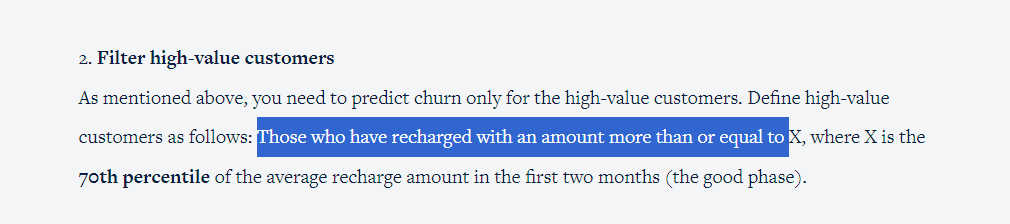

In [314]:
rech=data.columns.str.contains('rech')
data.columns[rech]

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'],
      dtype='object')

# what needs to be done
total_rech_amount= total_mobile_rech_6+total_mobile_rech_7+(av_recharge_data_6*total_rech_data_7)+(av_recharge_data_6*total_rech_data_7)

In [315]:
data['total_rech_amount_6_7']=(data['total_rech_amt_6']+data['total_rech_amt_7']+(data['av_rech_amt_data_6']*data['total_rech_data_6'])+(data['av_rech_amt_data_7']*data['total_rech_data_7']))/2
data['total_rech_amount_6_7'].quantile(.7)
data=data[data['total_rech_amount_6_7']>=data['total_rech_amount_6_7'].quantile(.7)]


EDA

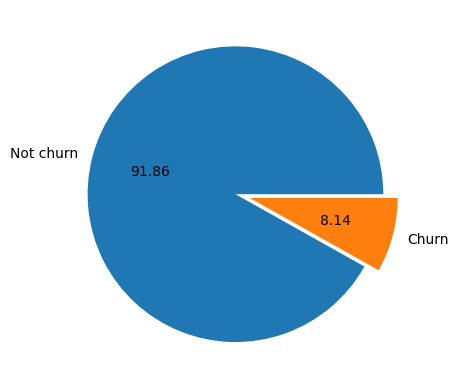

In [316]:
plt.pie(x=data['churn'].value_counts(), explode=[0,.1], labels=['Not churn','Churn'], autopct='%.2f');

In [317]:
# 8.2% churn in 3 month

In [318]:
# reading data based on total recharge cost monthwise

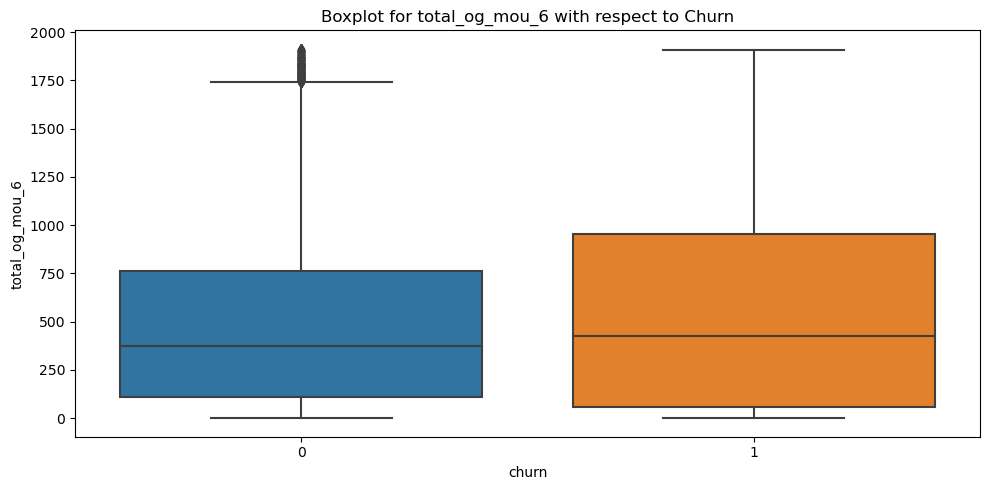

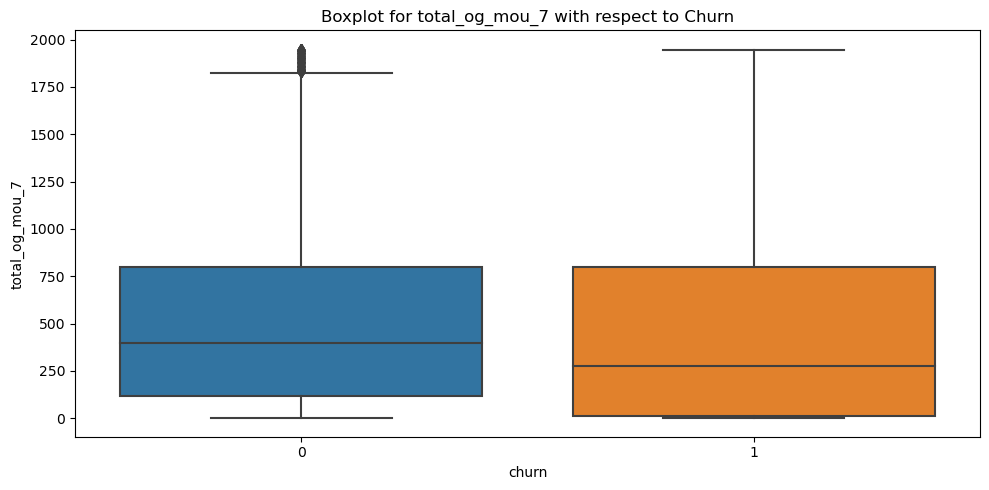

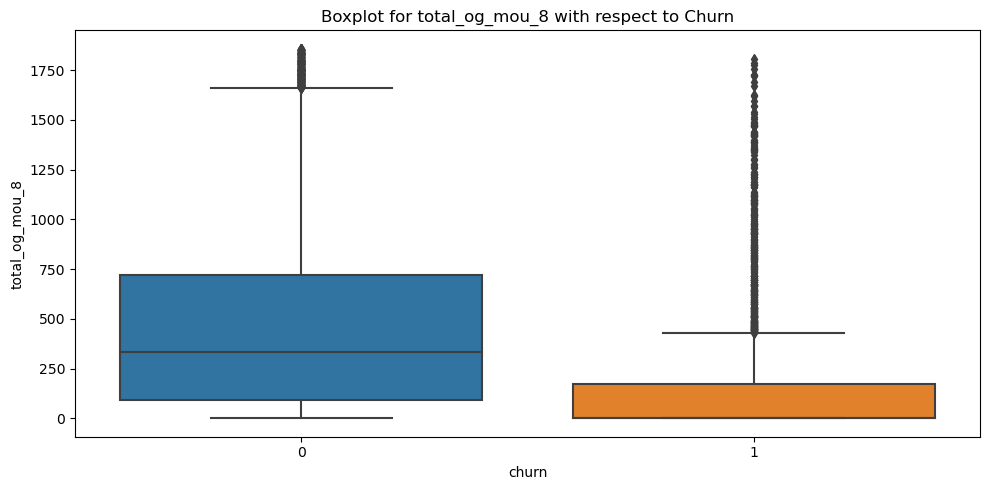

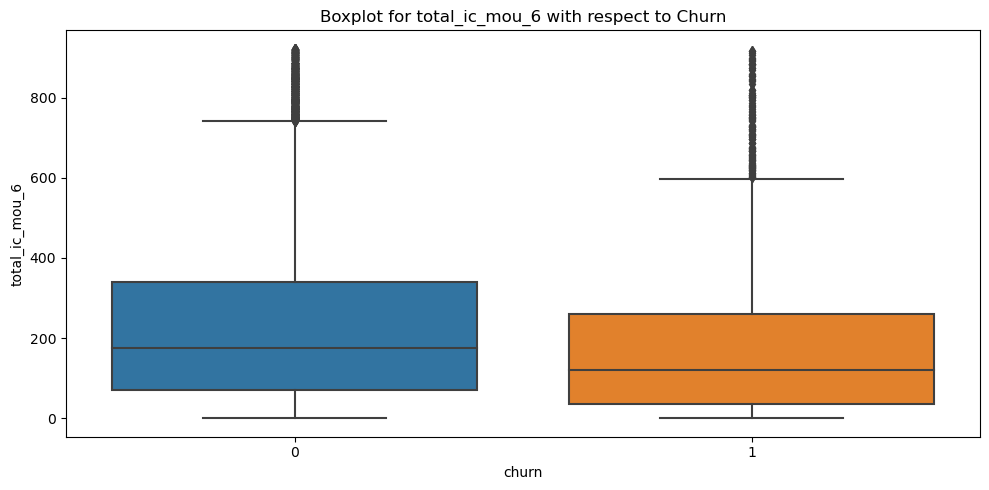

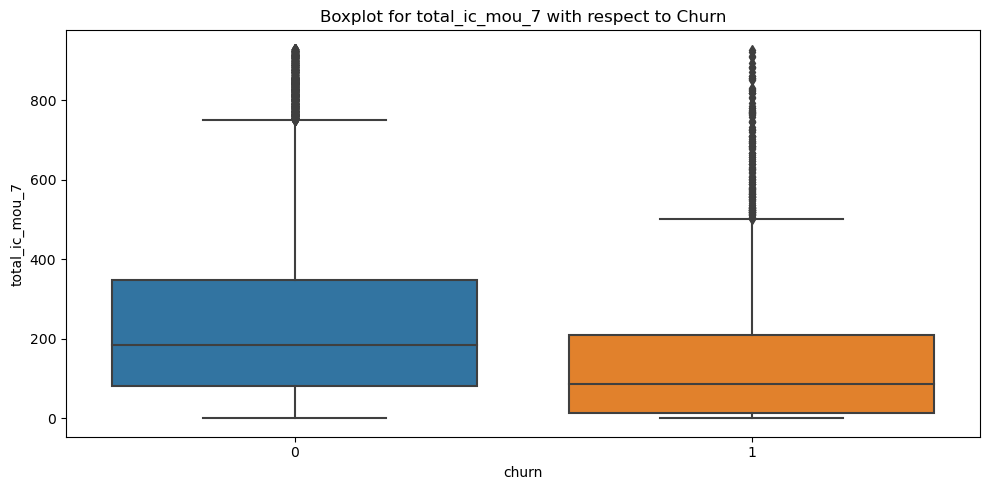

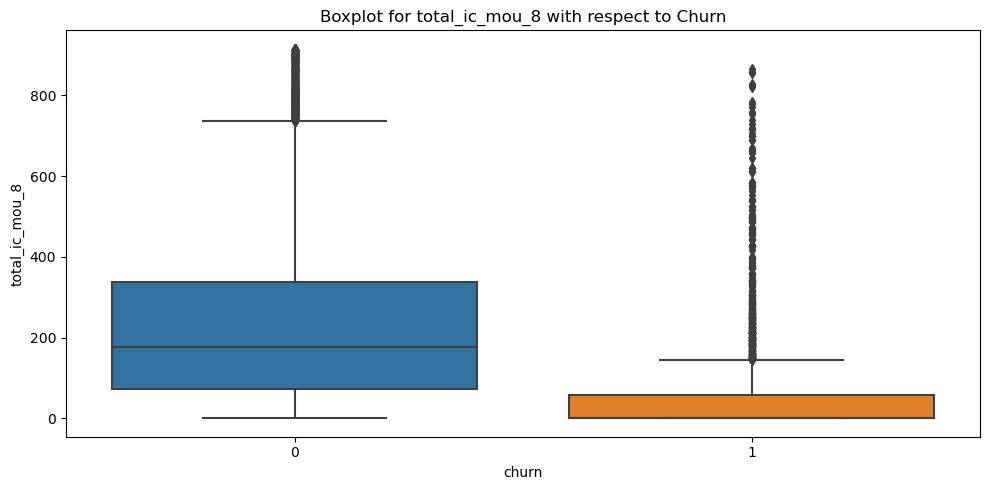

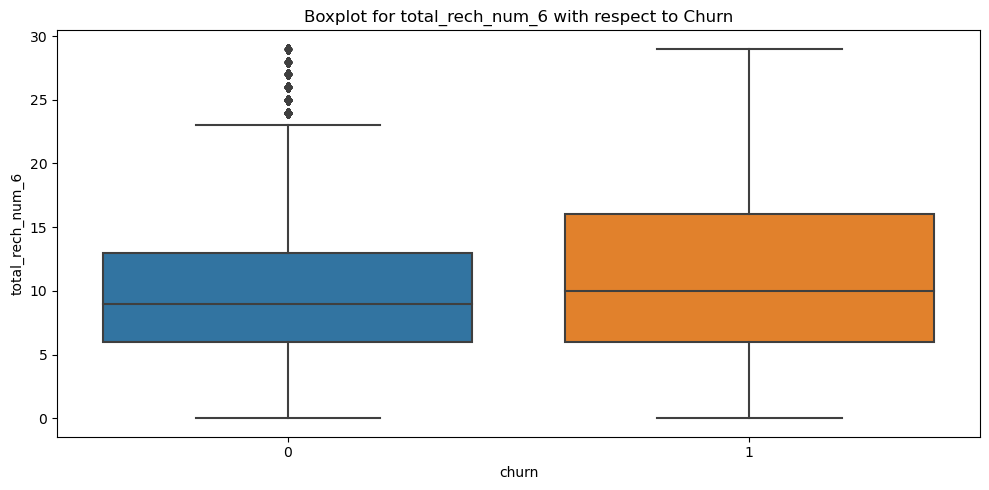

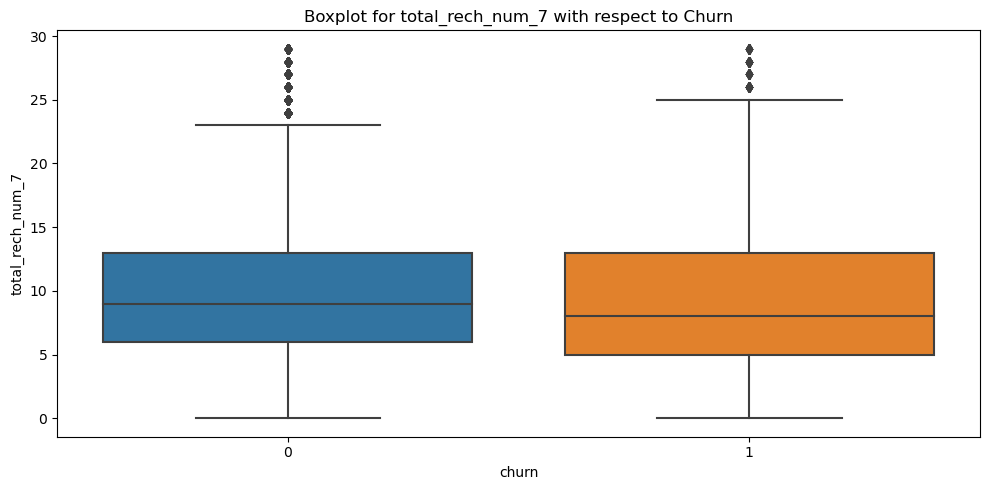

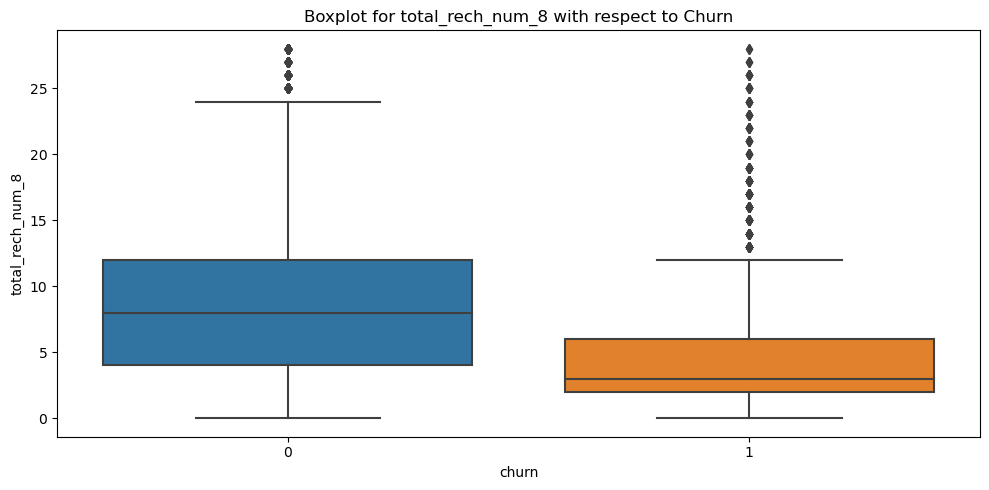

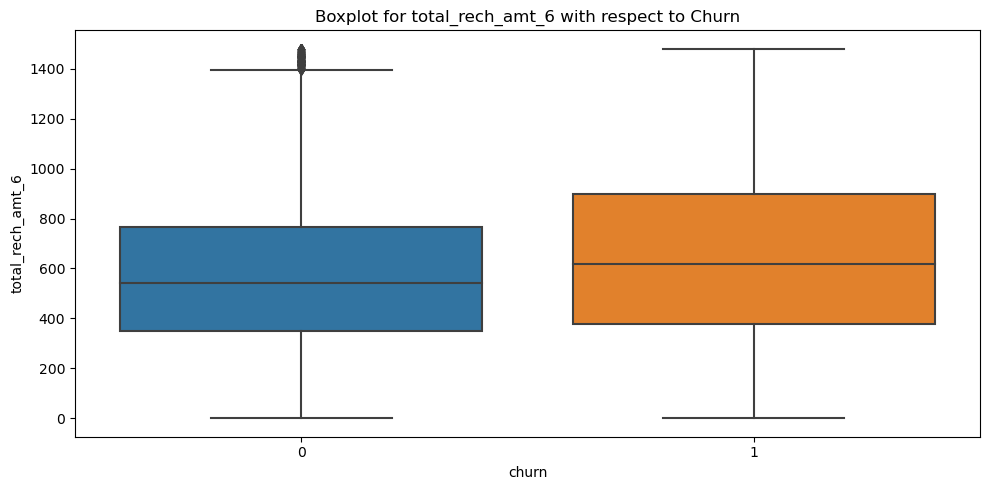

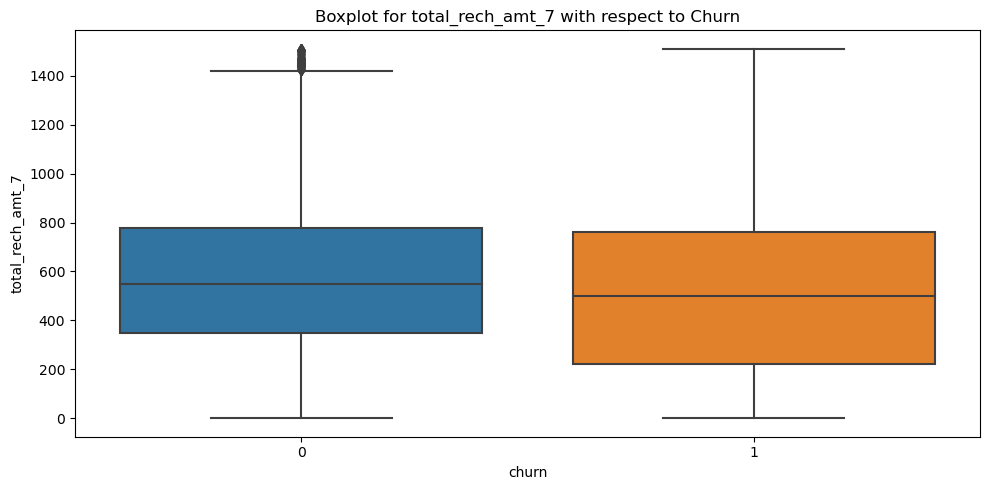

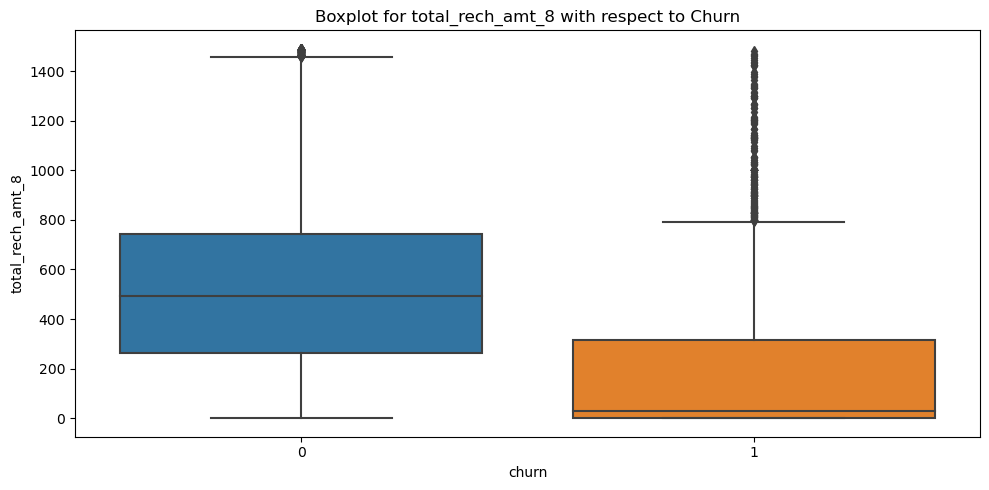

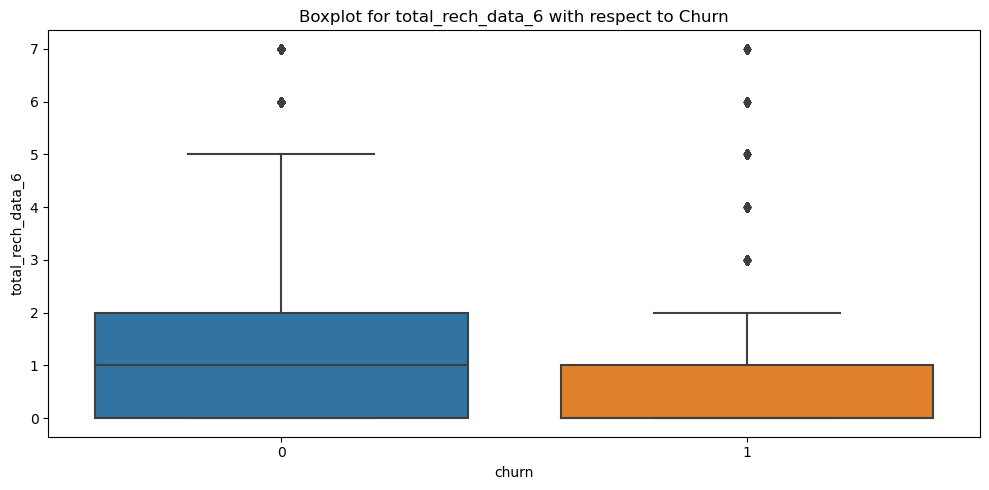

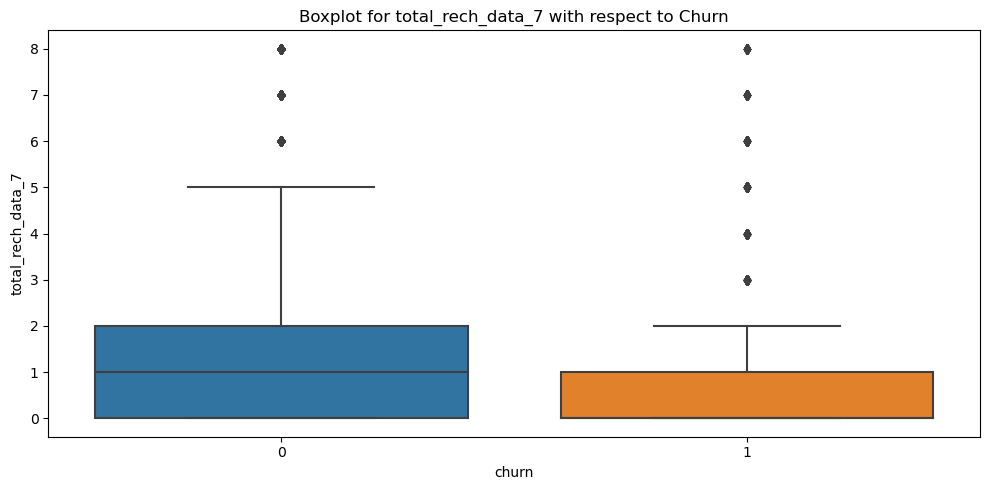

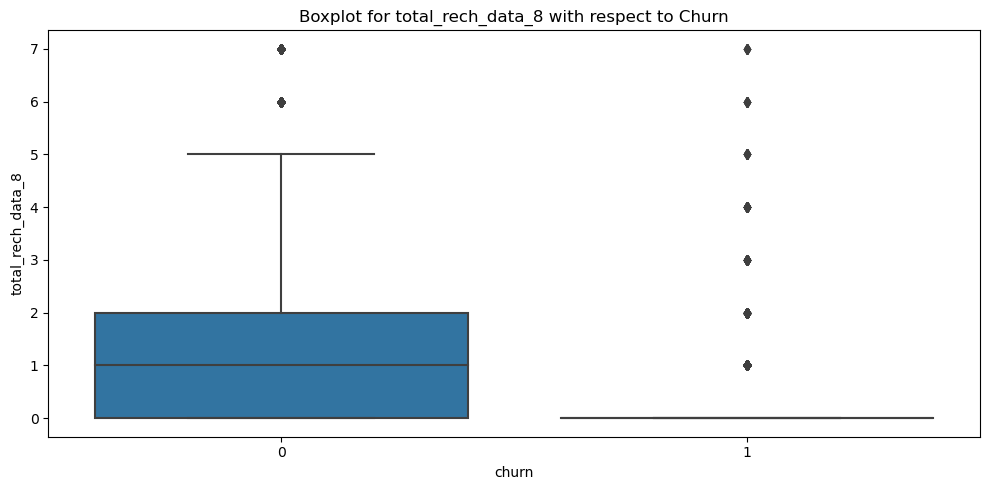

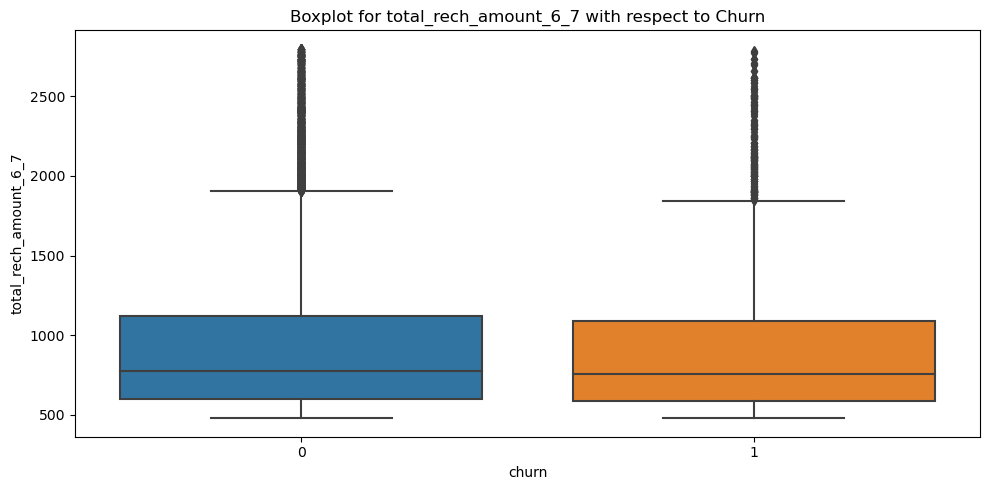

In [319]:

rech_columns = data.columns[data.columns.str.contains('total')]

# Loop through rech_columns
for i in rech_columns:
    plt.figure(figsize=(10, 5))
    data_ct = data[data[i] <= data[i].quantile(0.95)]
    sns.boxplot(x='churn', y=i, data=data_ct)
    plt.title(f'Boxplot for {i} with respect to Churn')
    plt.tight_layout()
    plt.show()


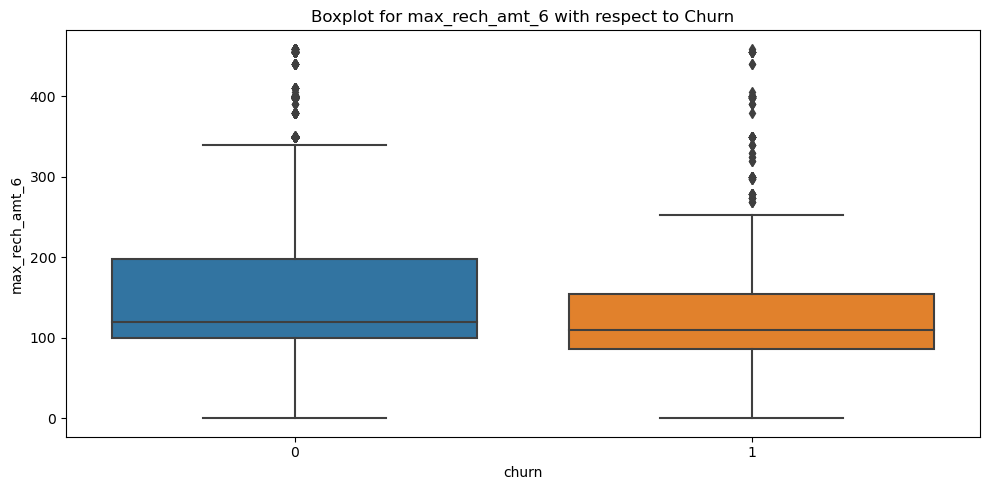

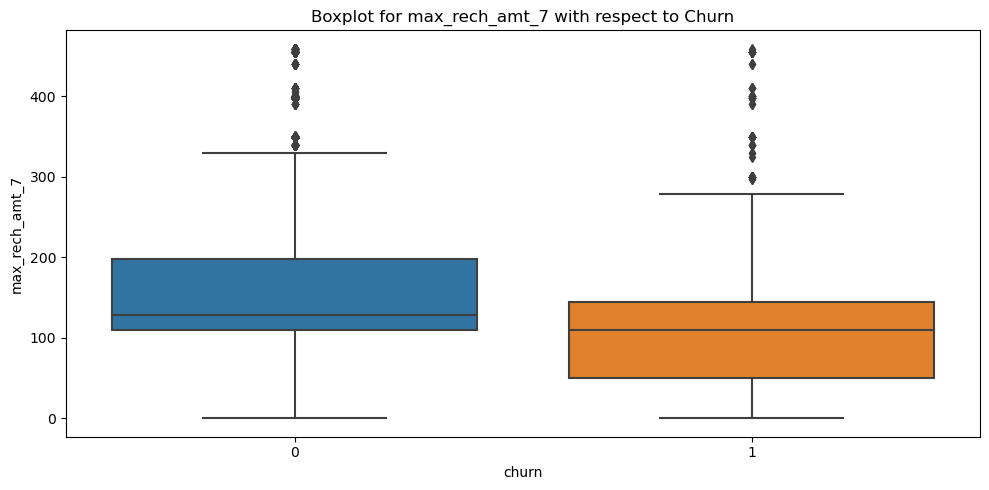

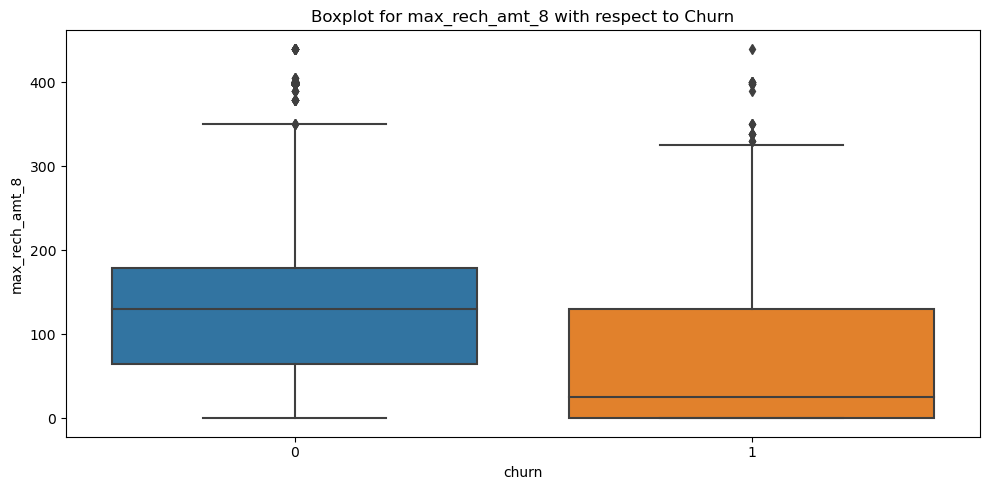

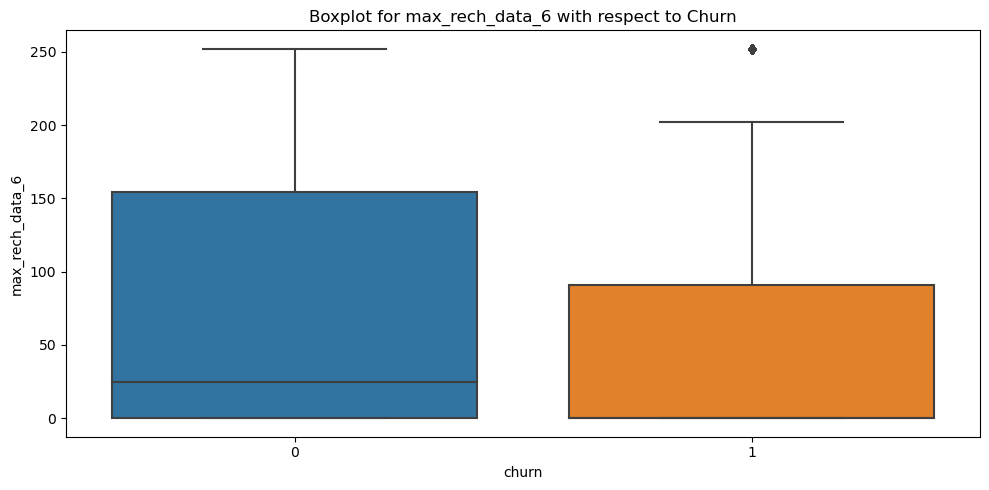

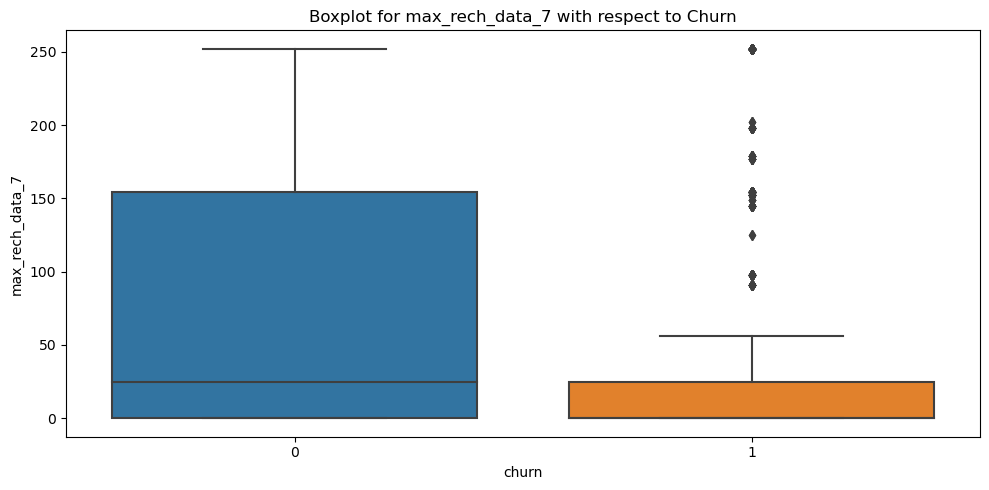

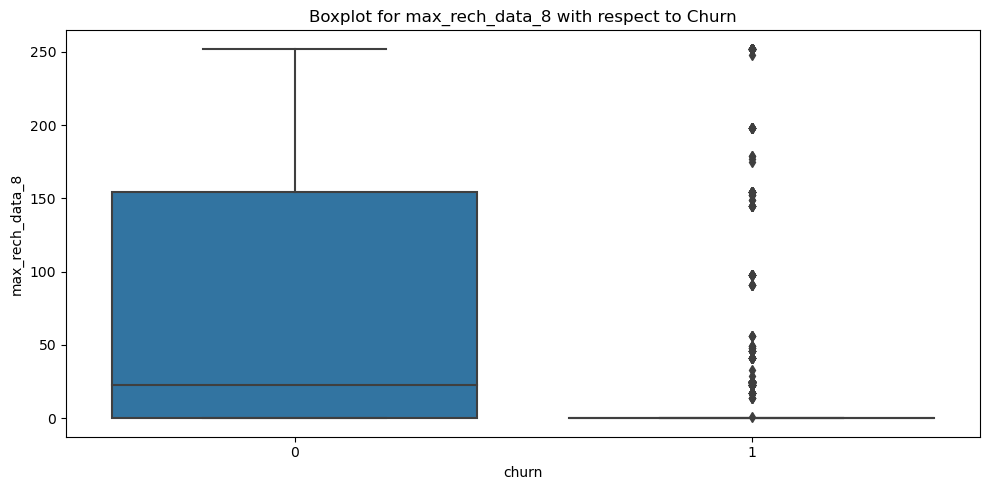

In [320]:

max_columns = data.columns[data.columns.str.contains('max')]

# Loop through rech_columns
for i in max_columns:
    plt.figure(figsize=(10, 5))
    data_ct = data[data[i] <= data[i].quantile(0.95)]
    sns.boxplot(x='churn', y=i, data=data_ct)
    plt.title(f'Boxplot for {i} with respect to Churn')
    plt.tight_layout()
    plt.show()

In [321]:
data.describe(percentiles=[.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_rech_amount_6_7
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000

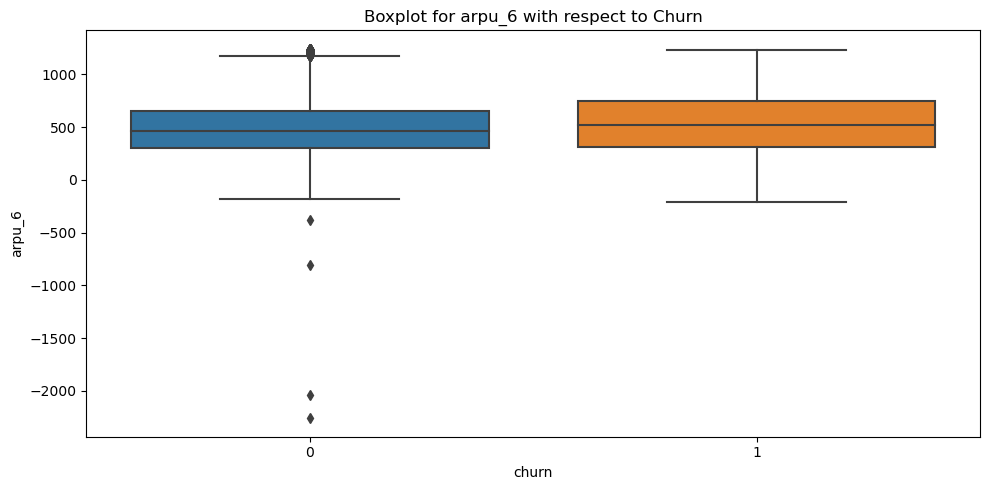

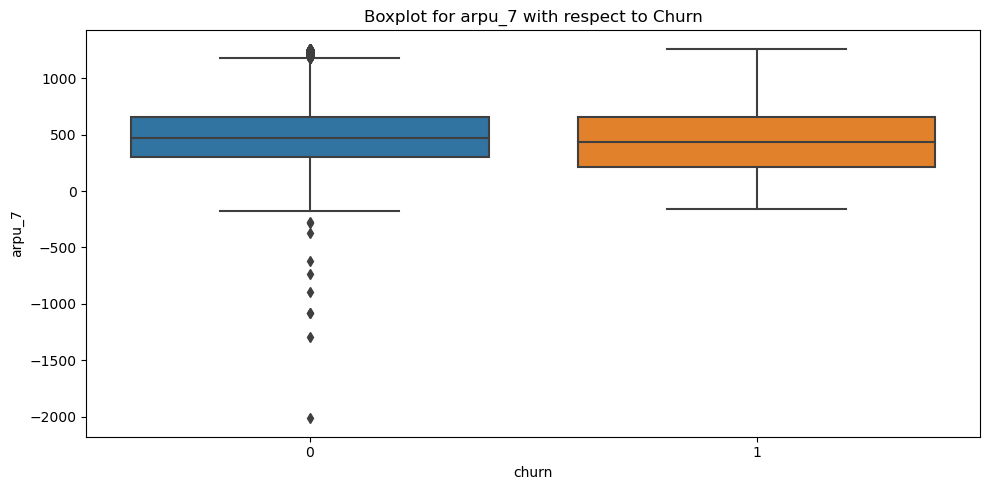

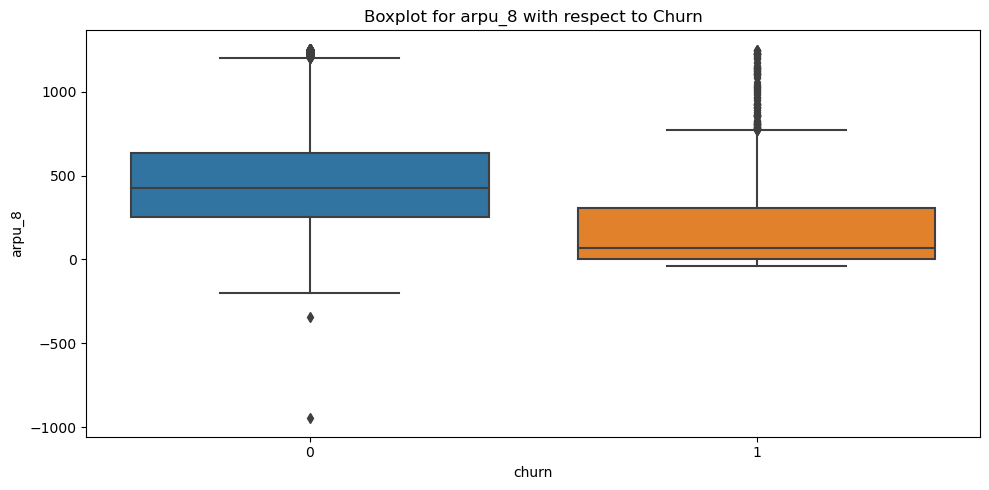

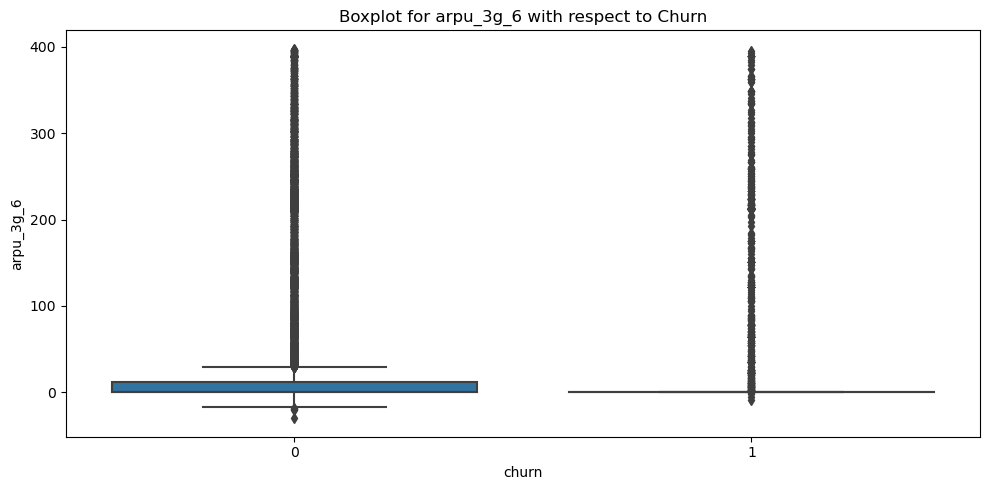

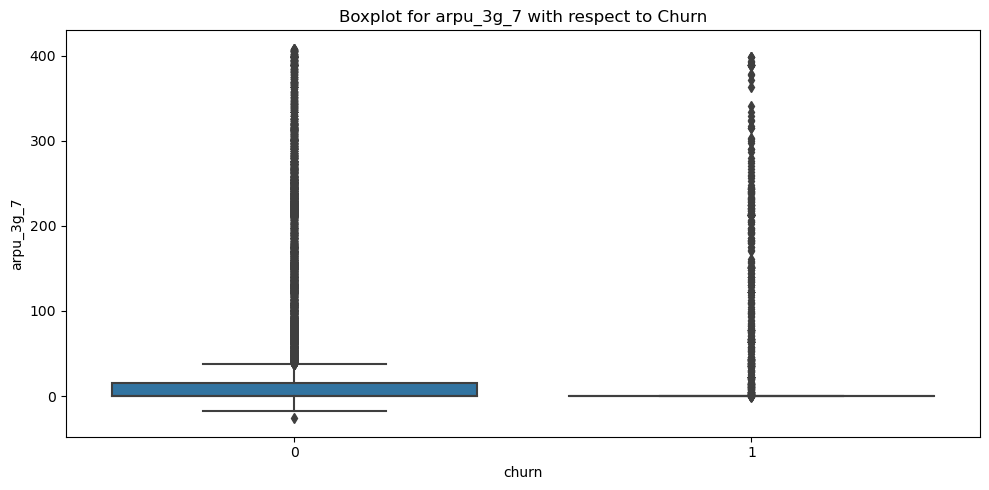

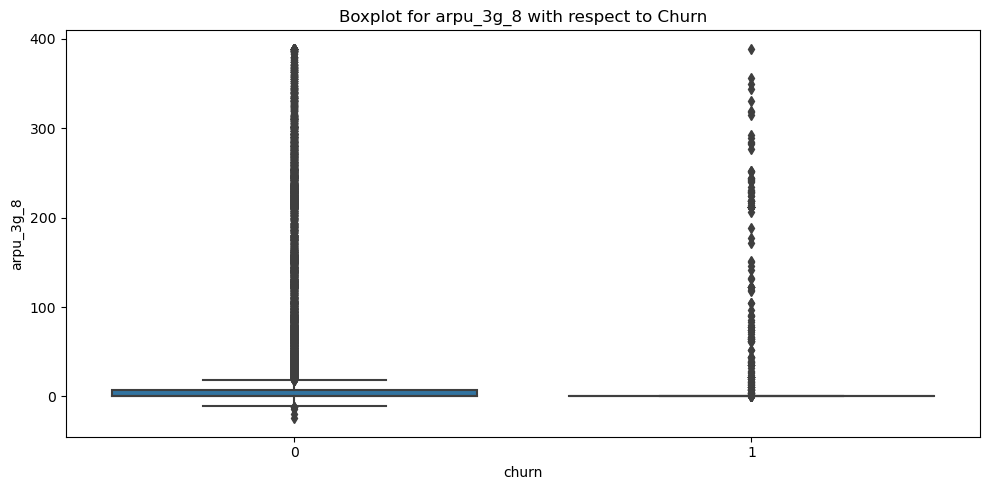

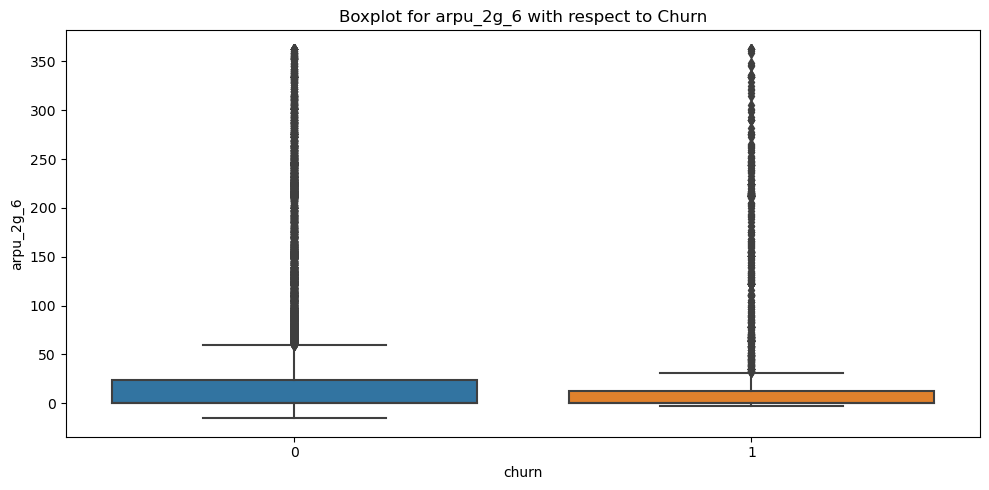

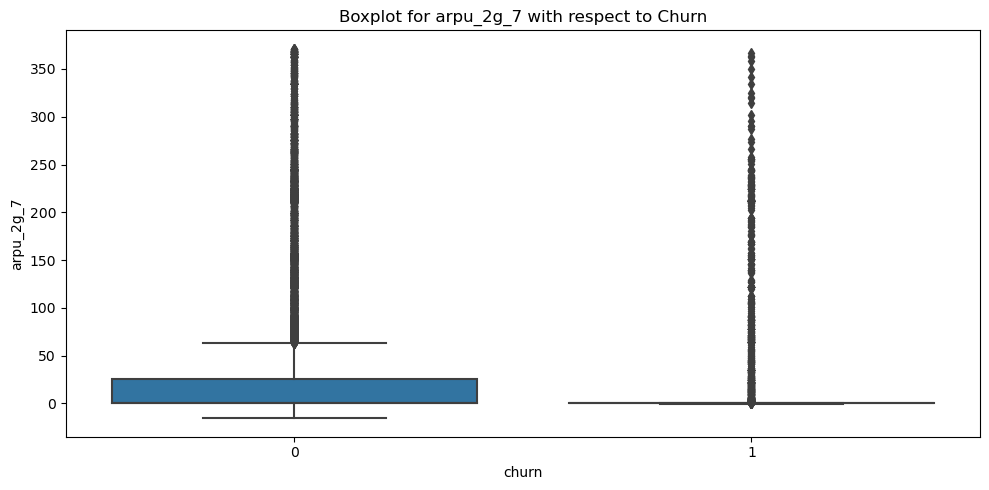

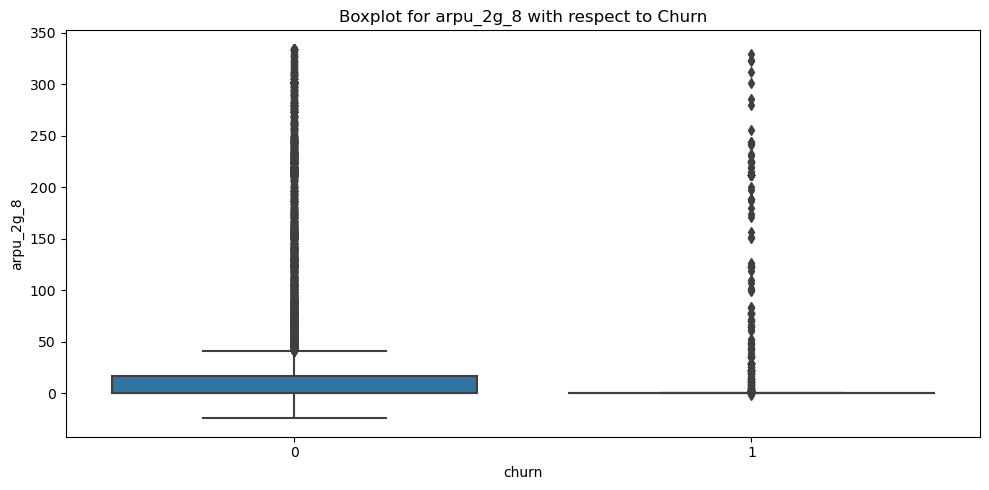

In [322]:

arpu_columns = data.columns[data.columns.str.contains('arpu')]

# Loop through rech_columns
for i in arpu_columns:
    plt.figure(figsize=(10, 5))
    data_ct = data[data[i] <= data[i].quantile(0.95)]
    
    sns.boxplot(x='churn', y=i, data=data_ct)
    
    plt.title(f'Boxplot for {i} with respect to Churn')
    plt.tight_layout()
    plt.show()

<Axes: xlabel='churn', ylabel='aon'>

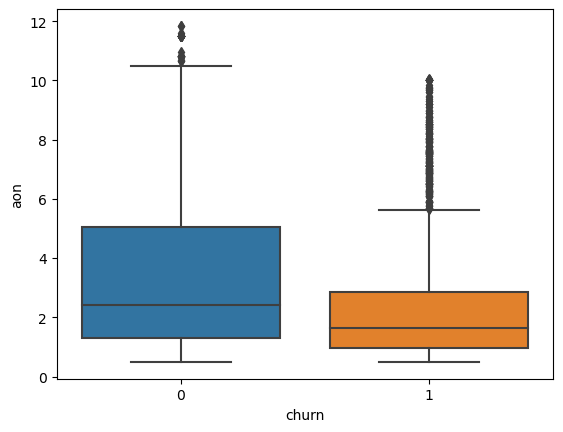

In [323]:
sns.boxplot(x=data['churn'],y=data['aon']/365, data=data)

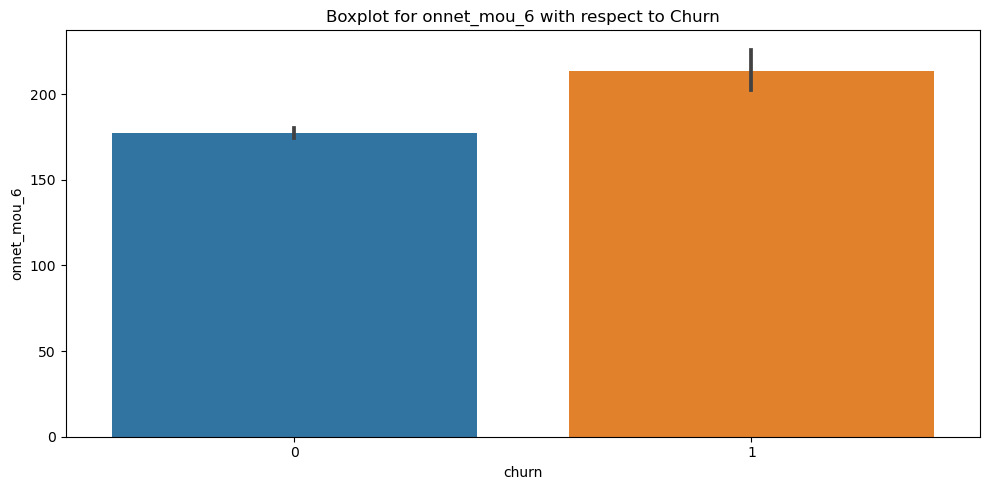

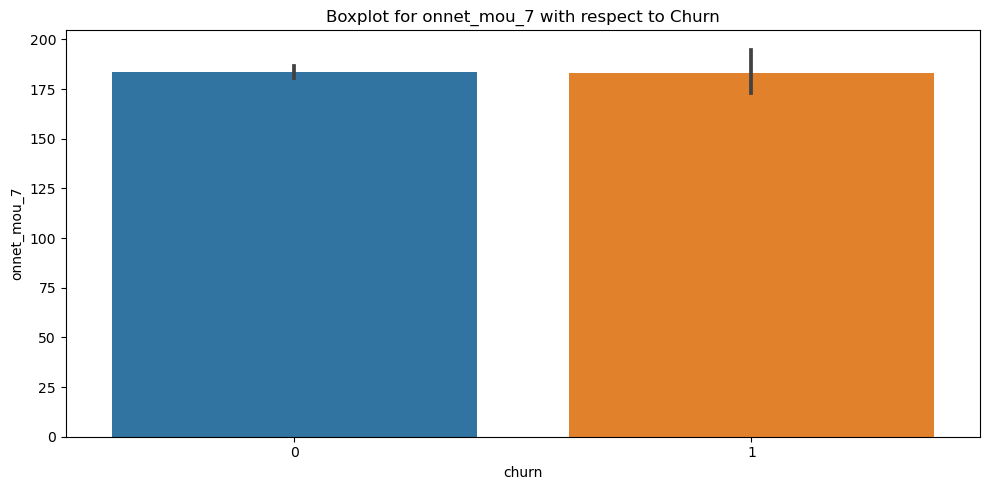

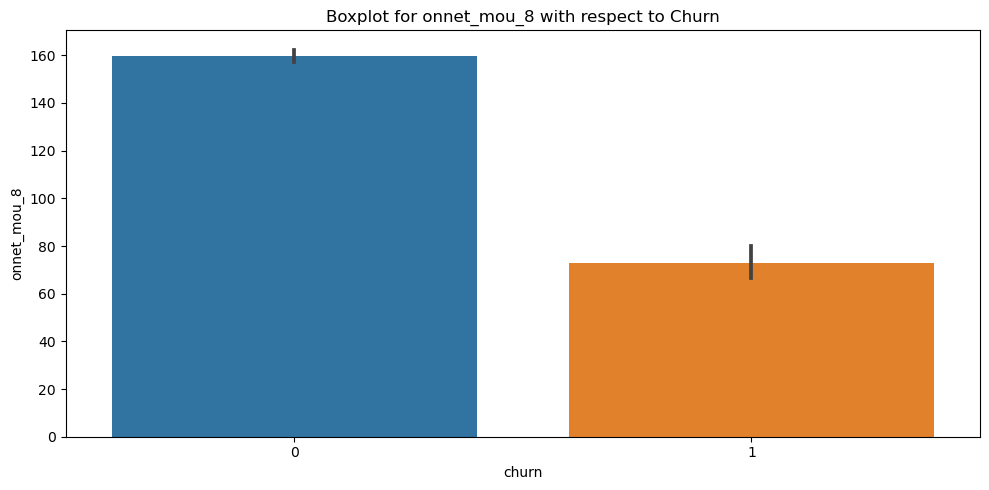

In [324]:
arpu_columns = data.columns[data.columns.str.contains('onnet')]

# Loop through rech_columns
for i in arpu_columns:
    plt.figure(figsize=(10, 5))
    data_ct = data[data[i] <= data[i].quantile(0.95)]
    
    sns.barplot(x='churn', y=i, data=data_ct)
    
    plt.title(f'Boxplot for {i} with respect to Churn')
    plt.tight_layout()
    plt.show()

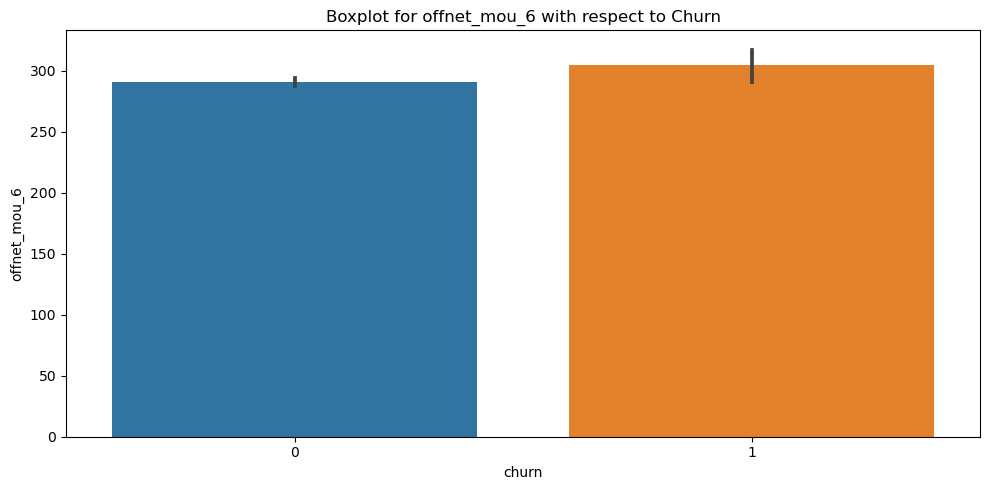

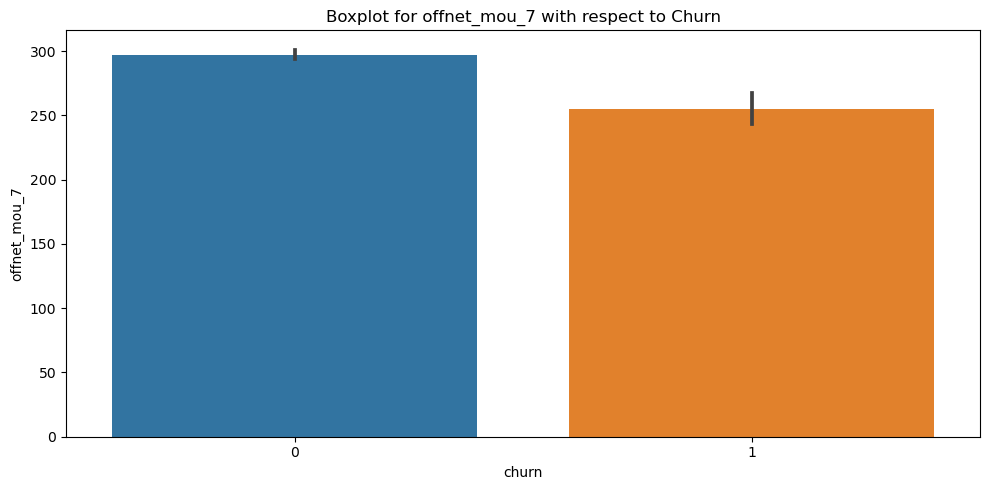

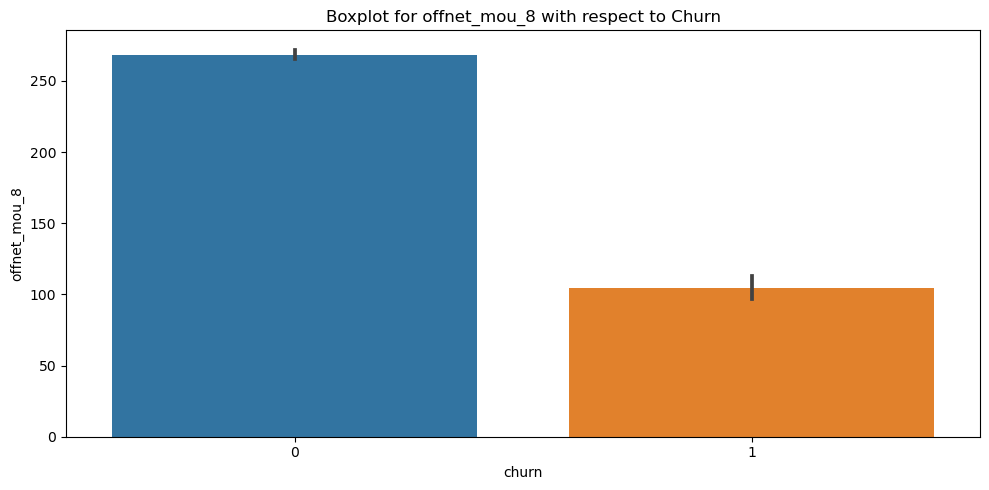

In [325]:
arpu_columns = data.columns[data.columns.str.contains('offnet')]

# Loop through rech_columns
for i in arpu_columns:
    plt.figure(figsize=(10, 5))
    data_ct = data[data[i] <= data[i].quantile(0.95)]
    
    sns.barplot(x='churn', y=i, data=data_ct)
    
    plt.title(f'Boxplot for {i} with respect to Churn')
    plt.tight_layout()
    plt.show()

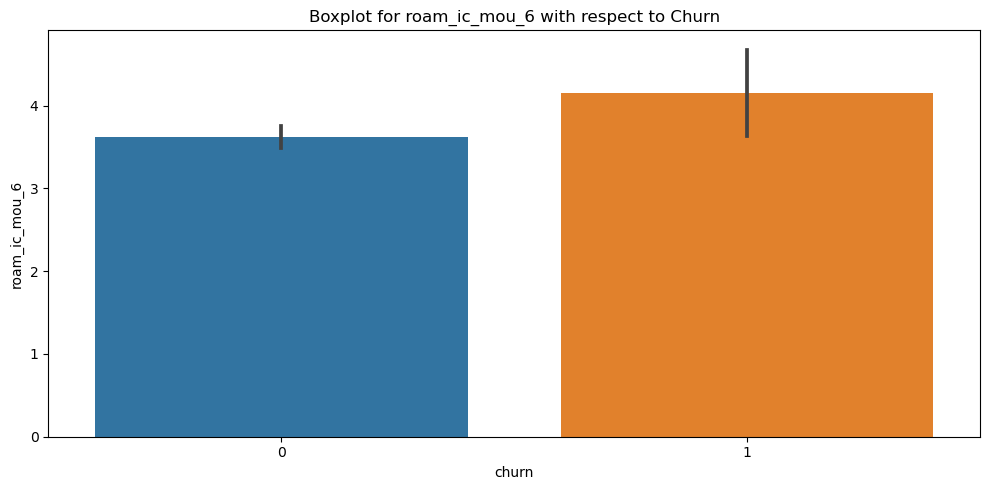

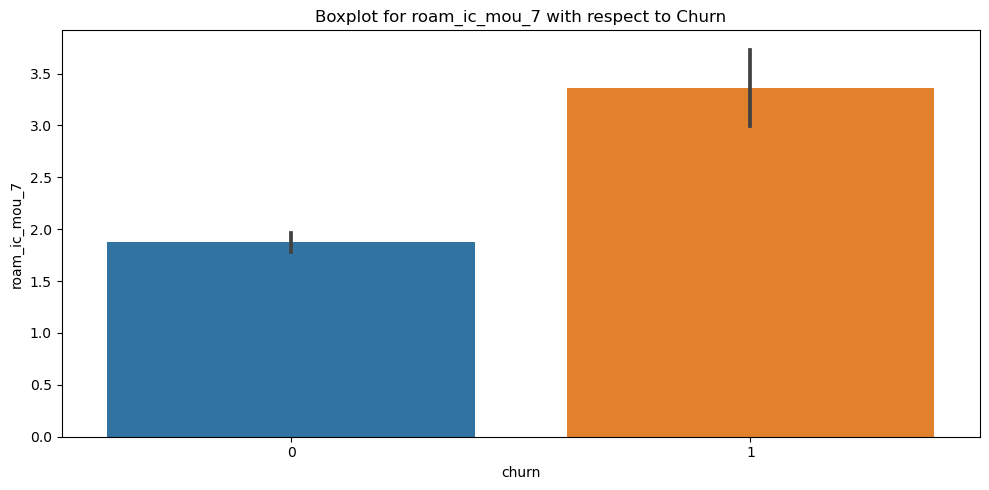

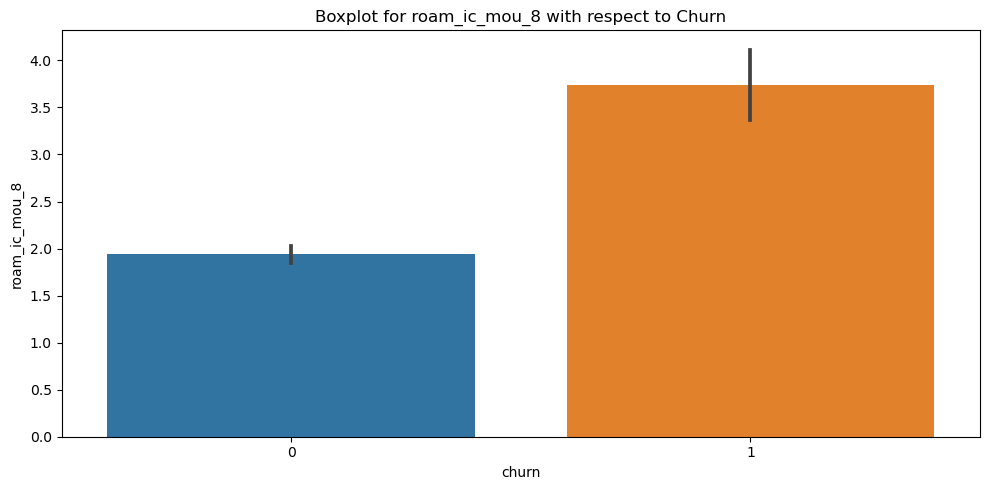

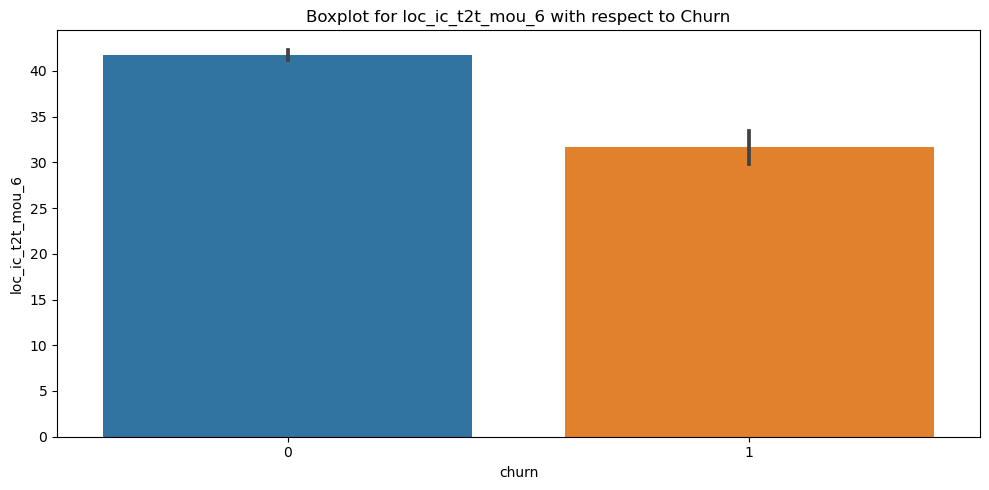

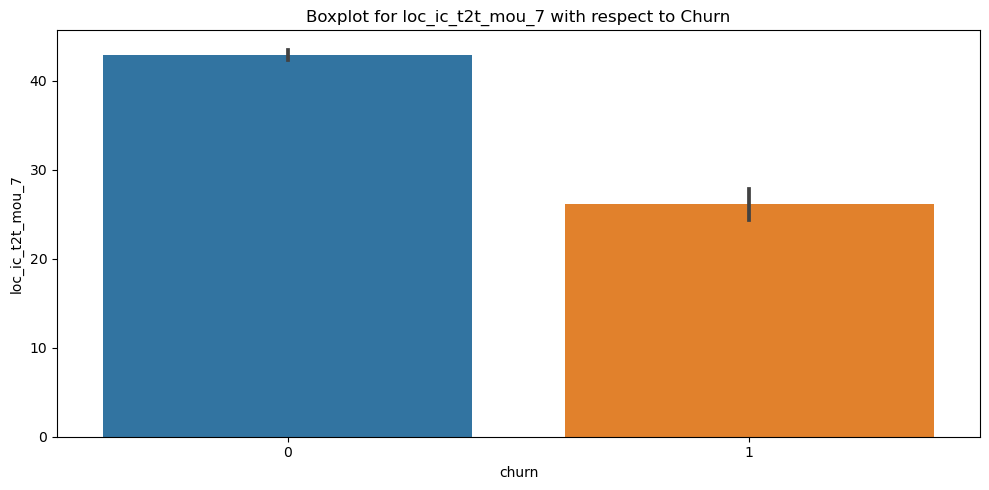

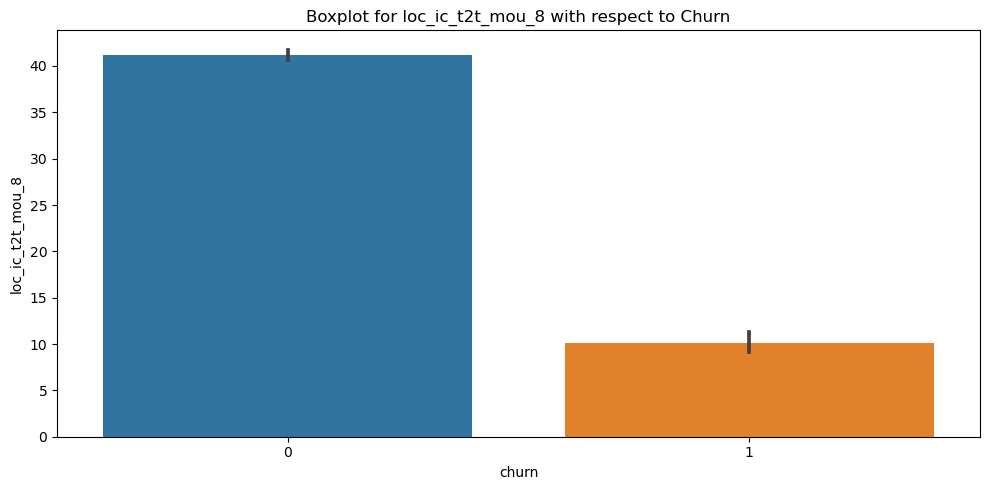

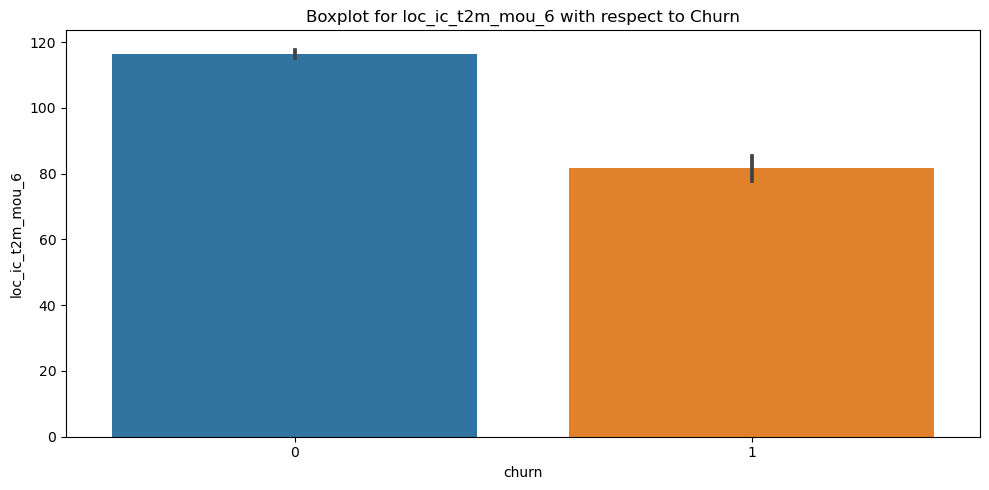

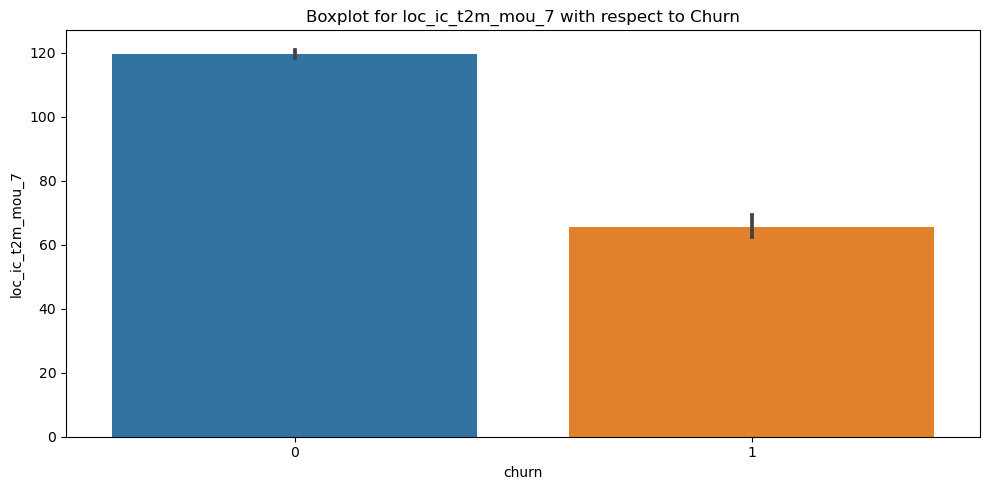

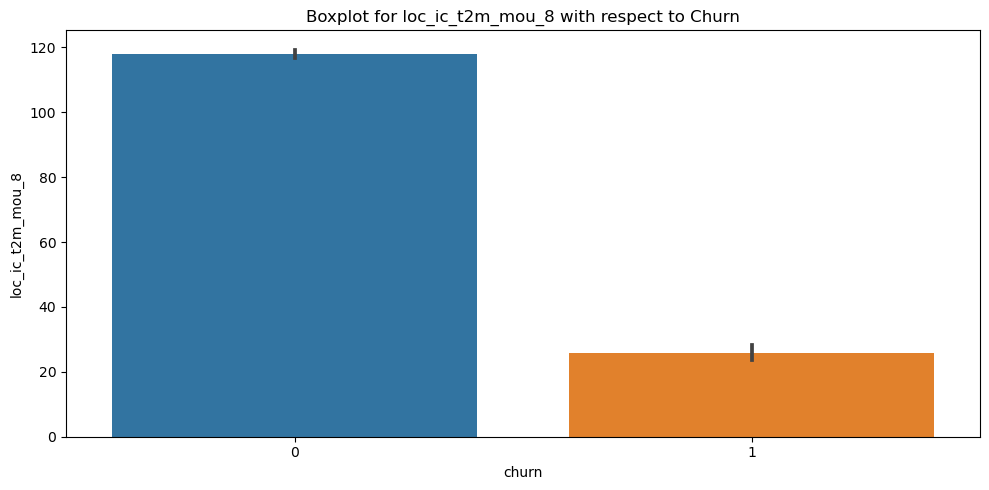

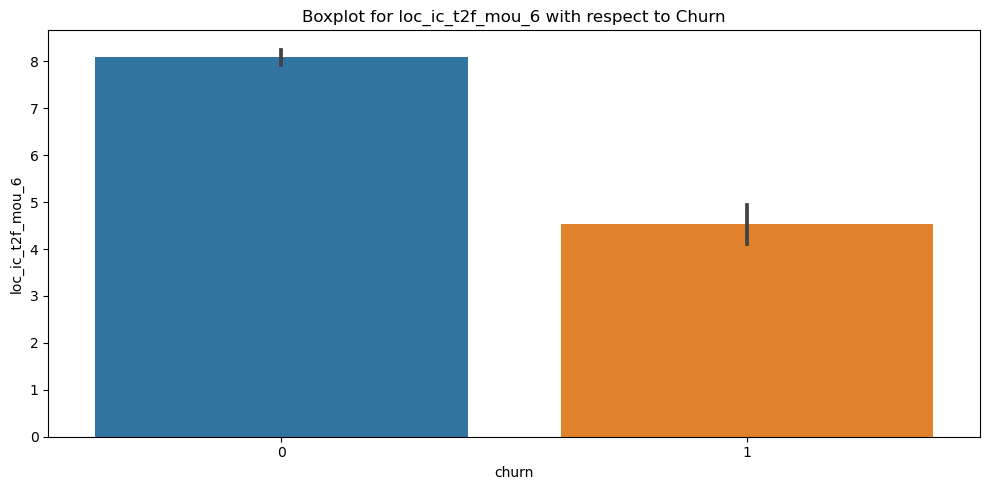

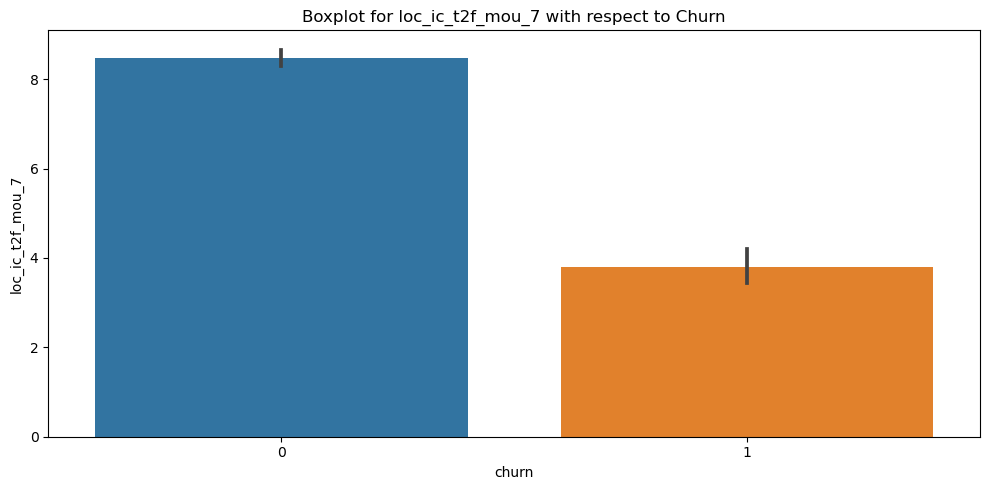

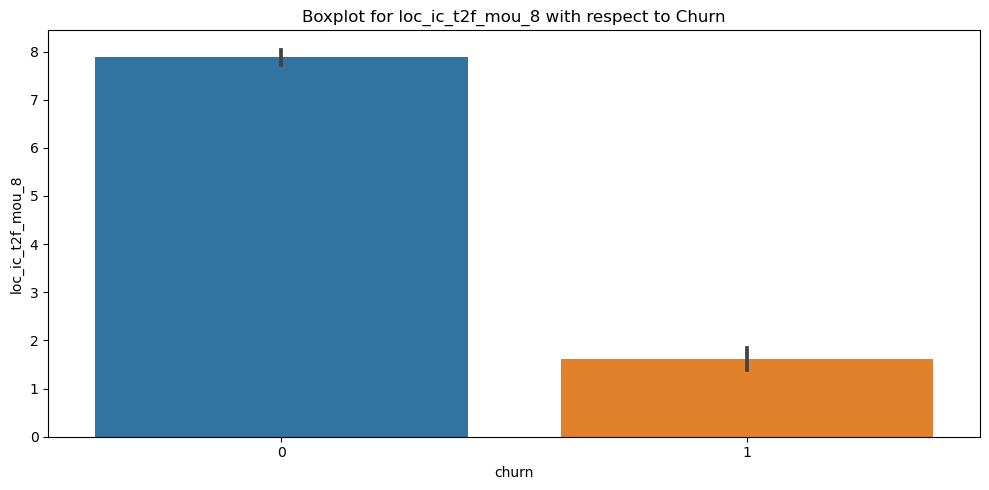

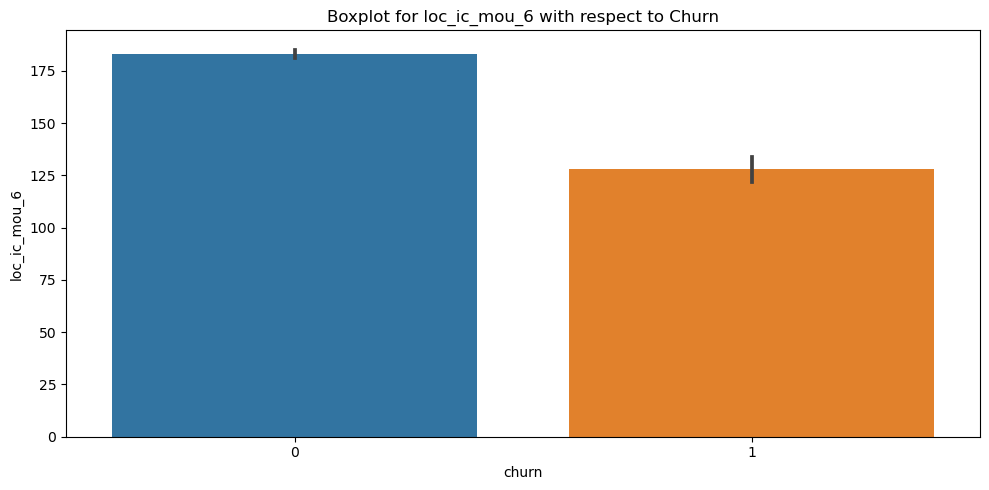

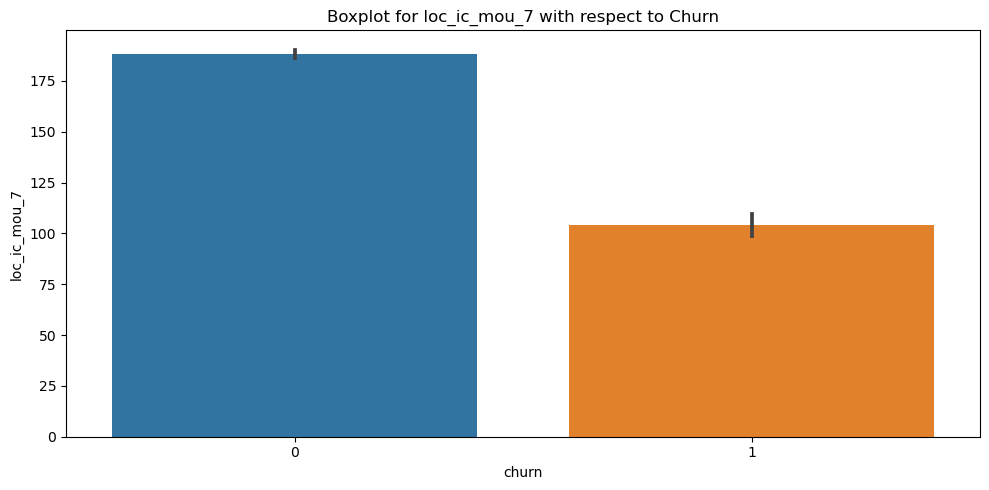

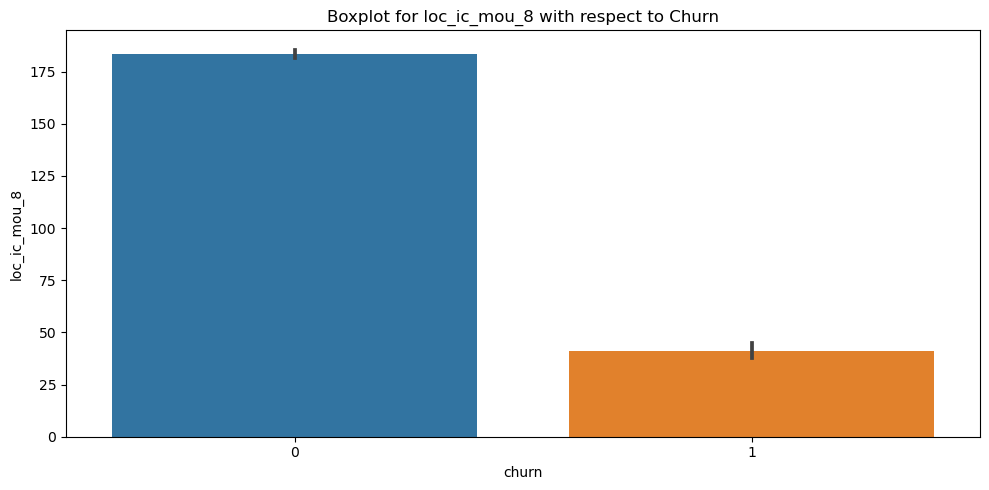

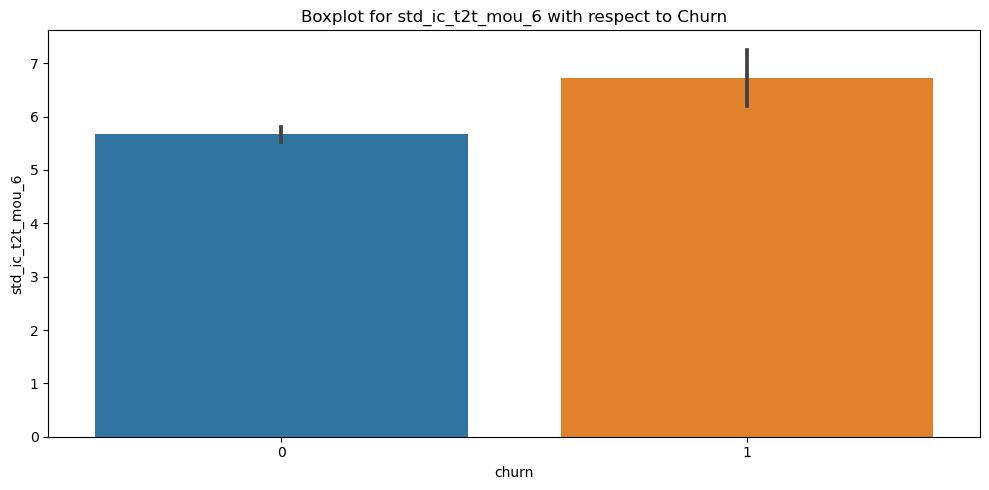

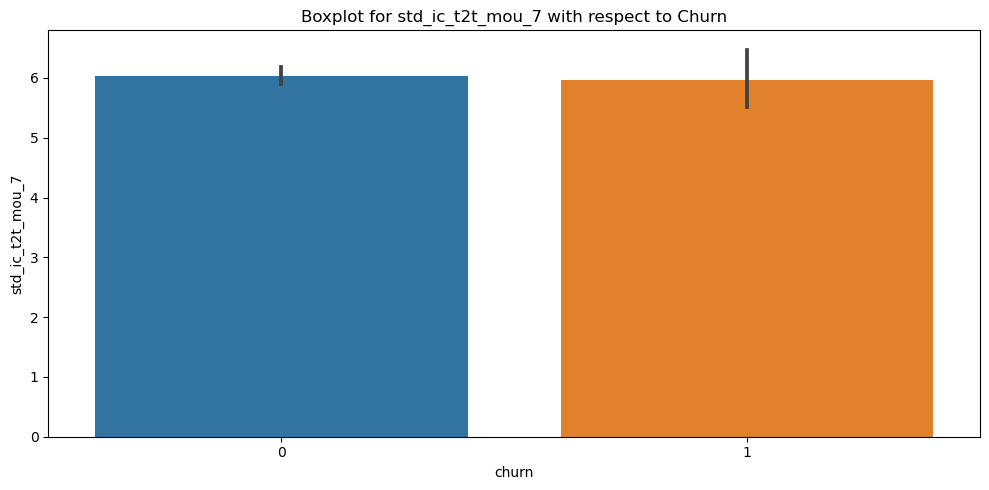

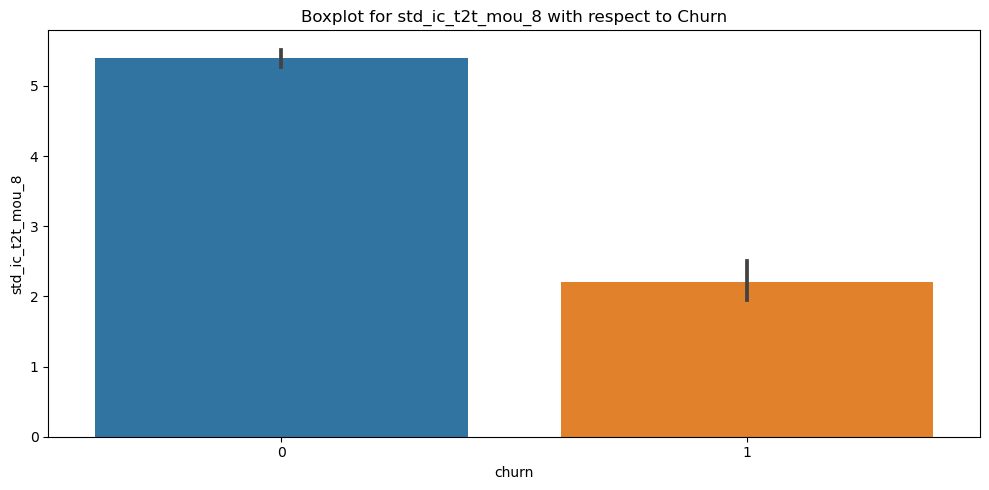

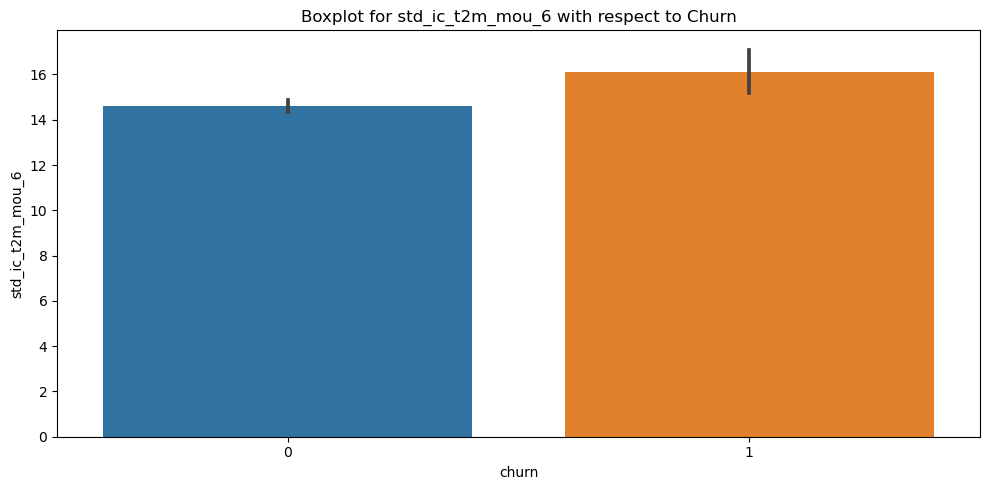

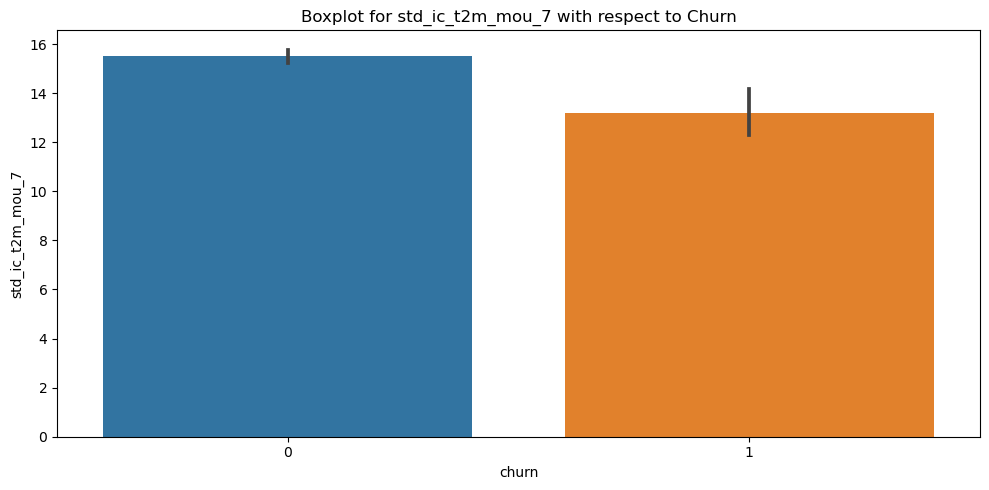

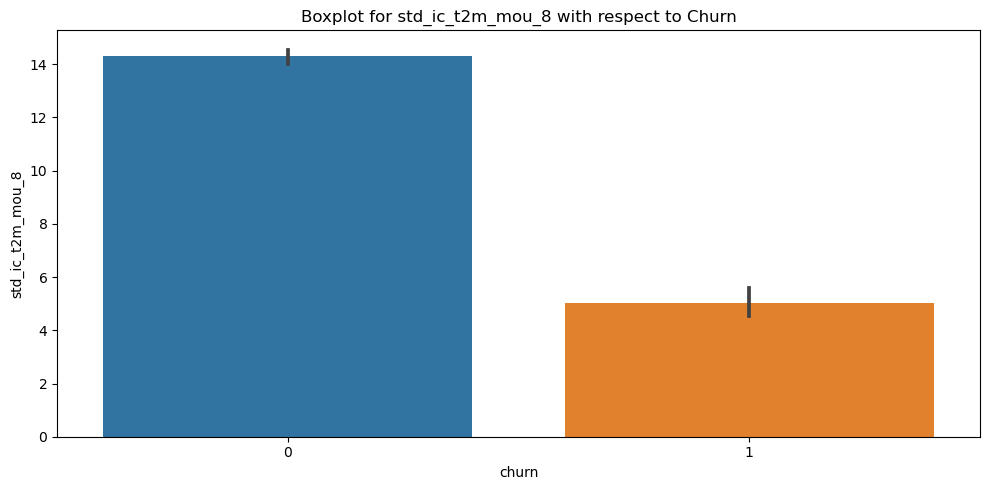

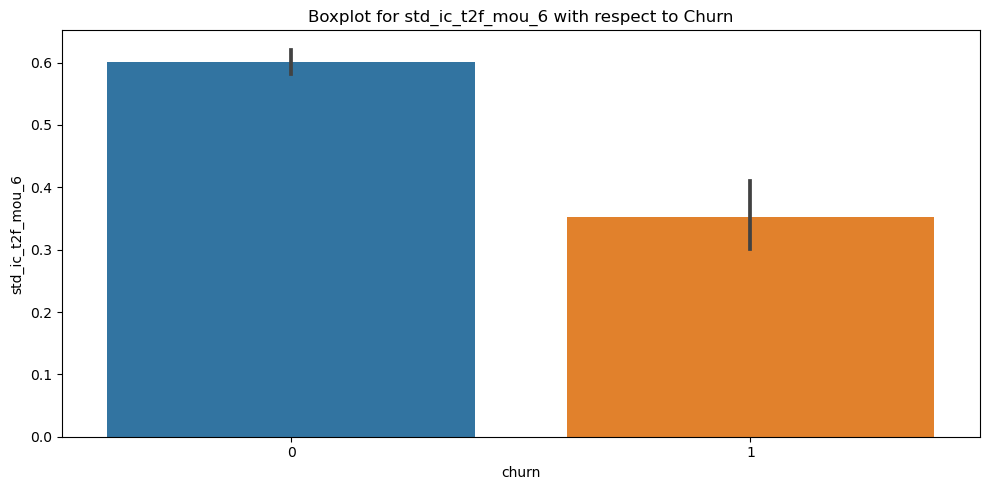

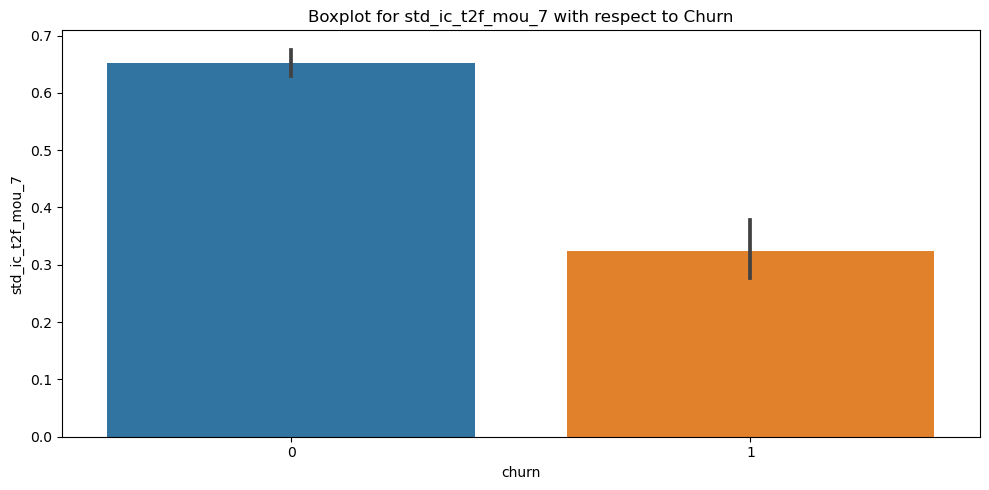

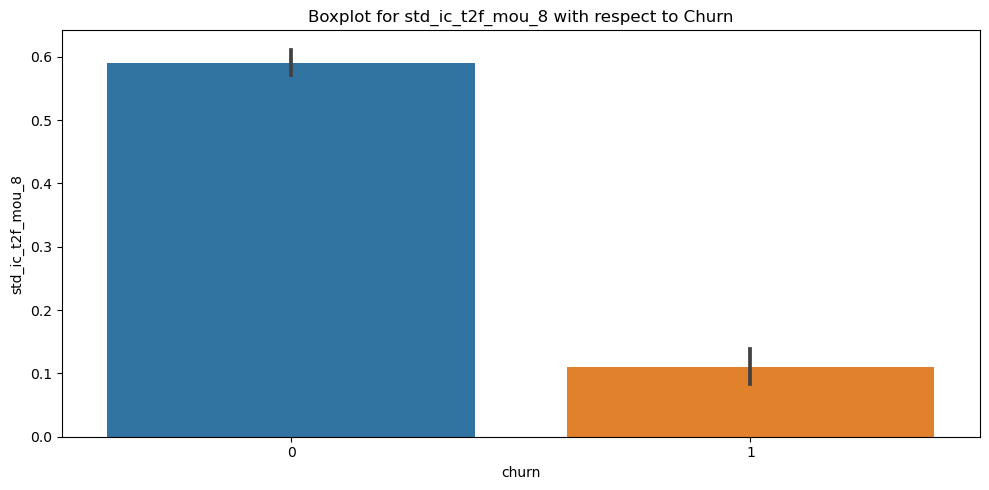

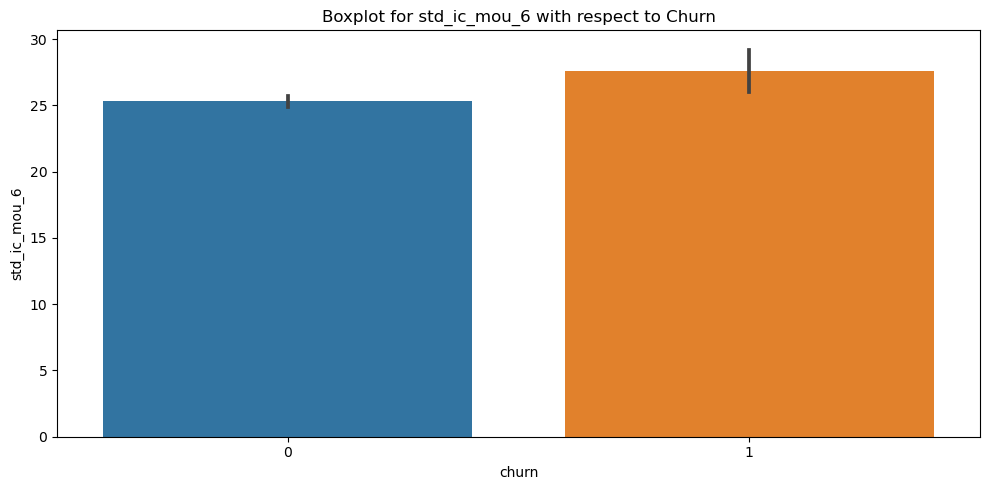

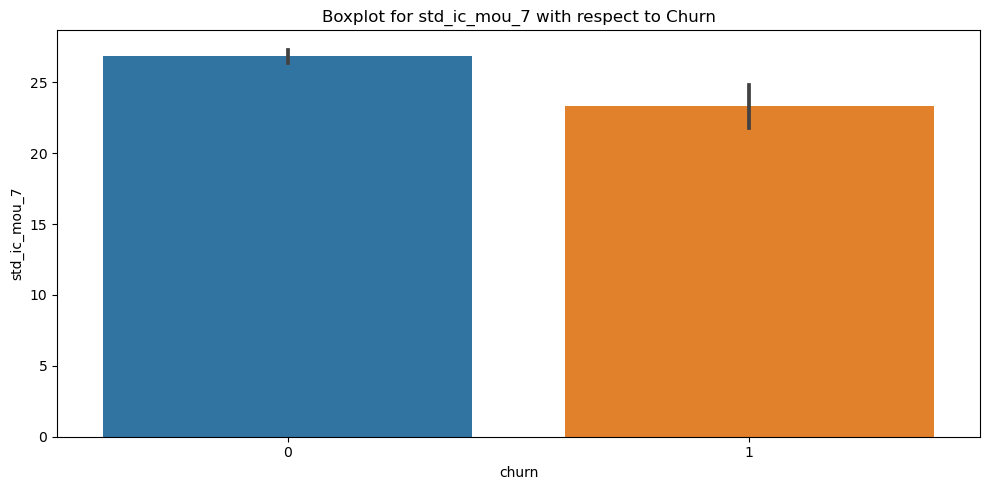

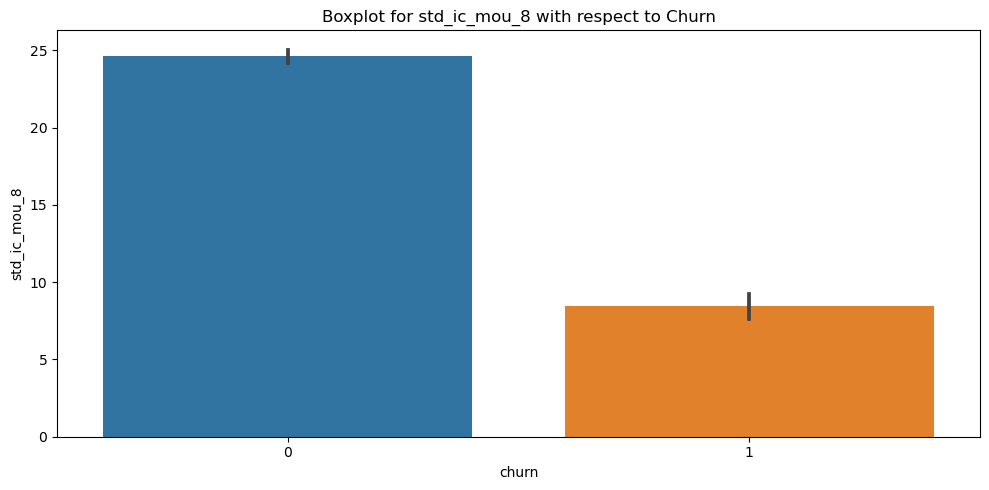

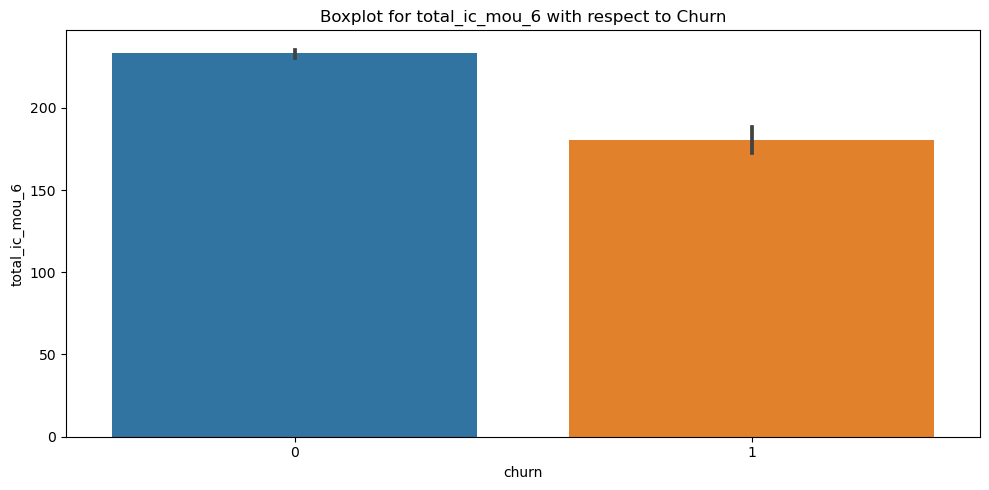

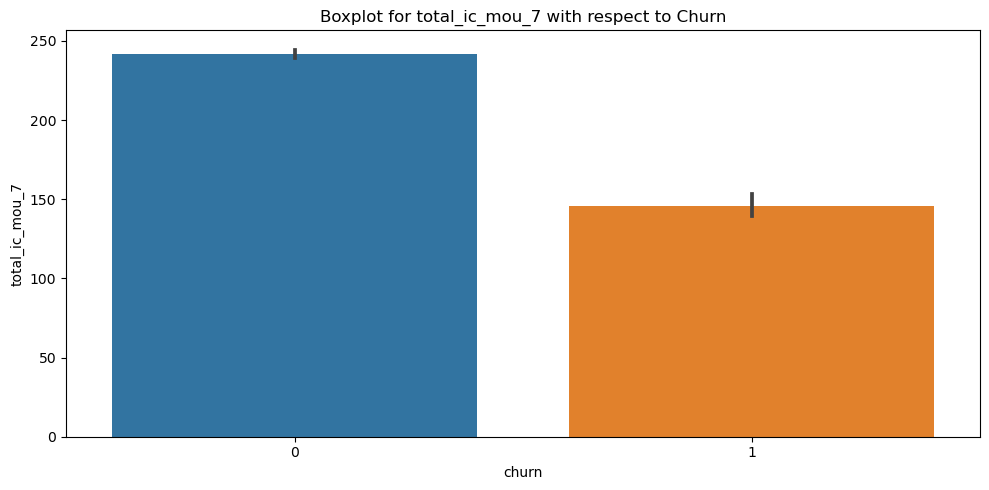

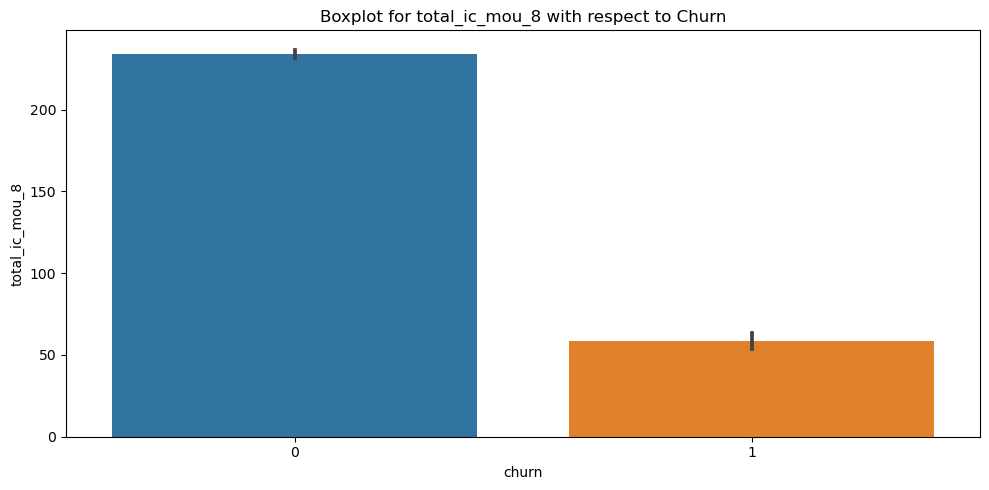

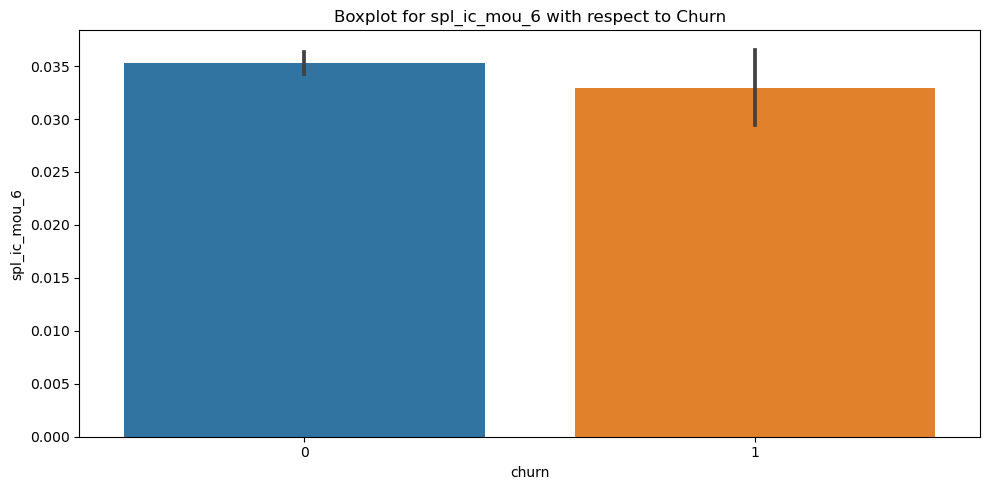

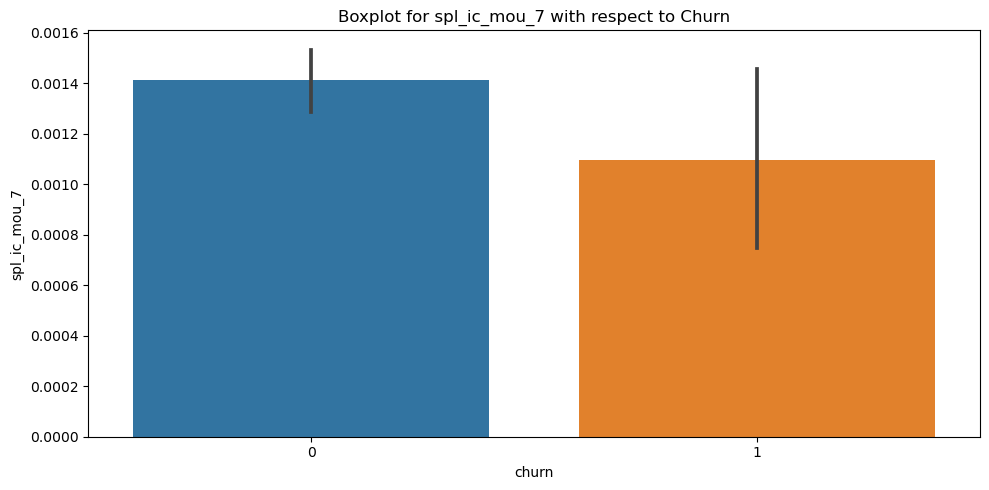

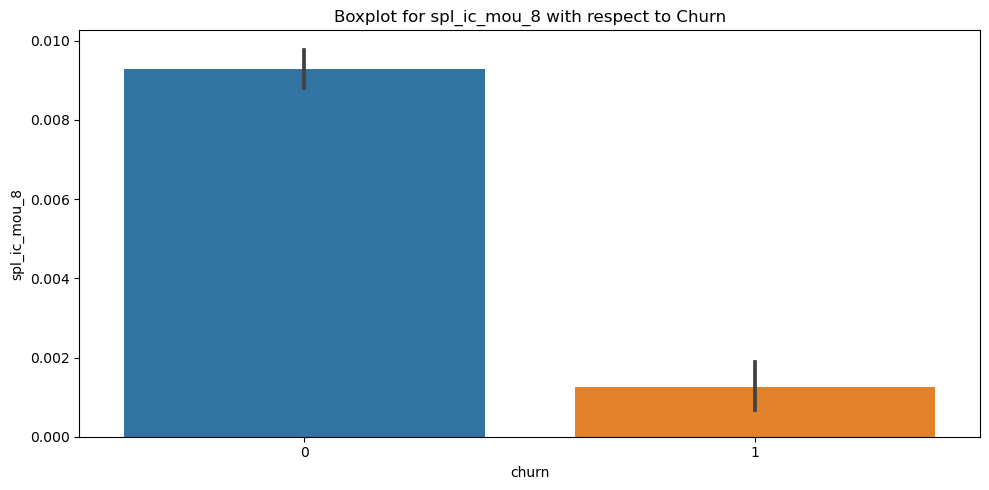

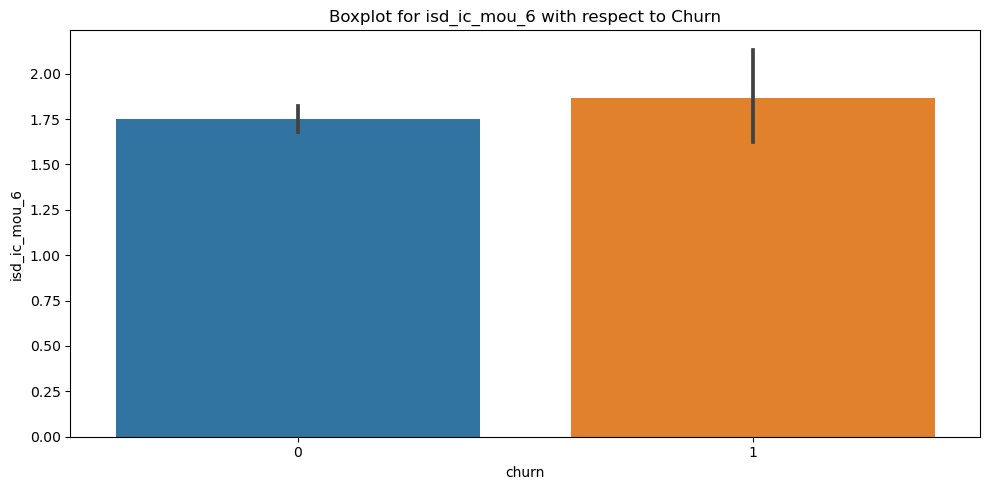

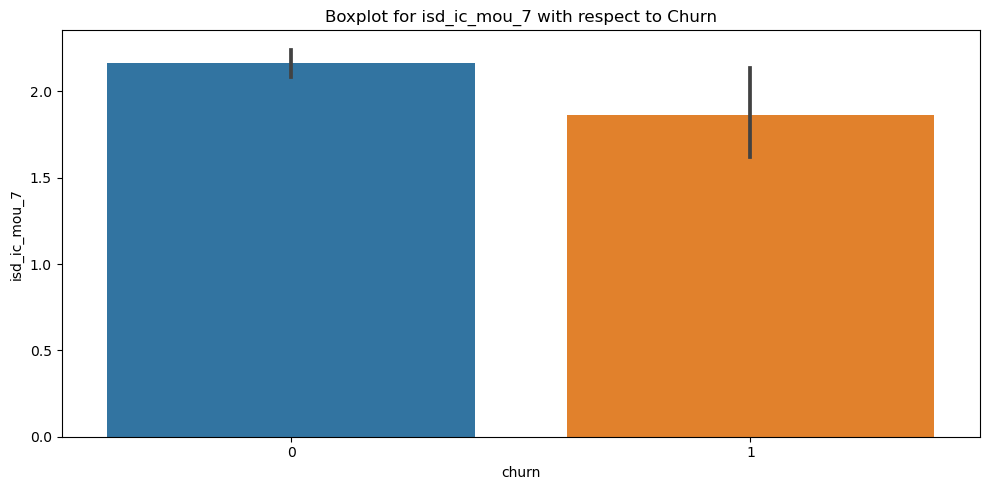

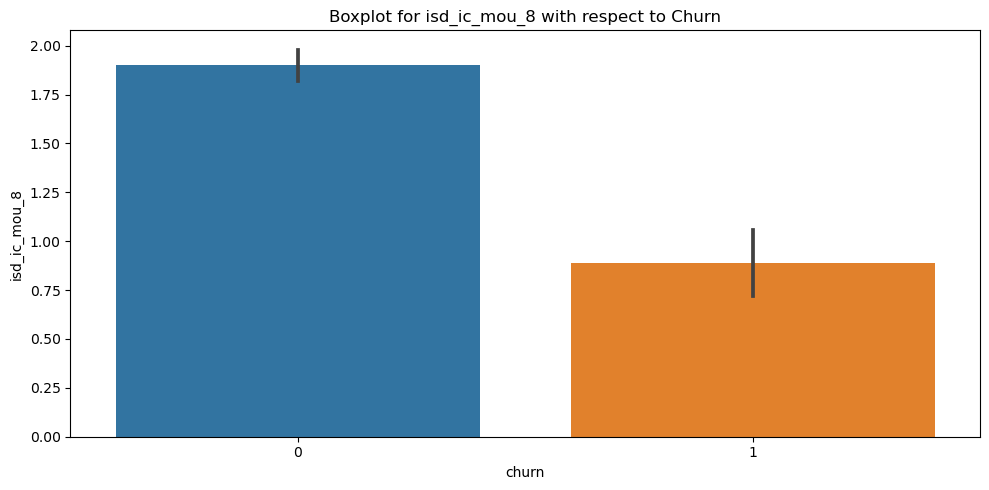

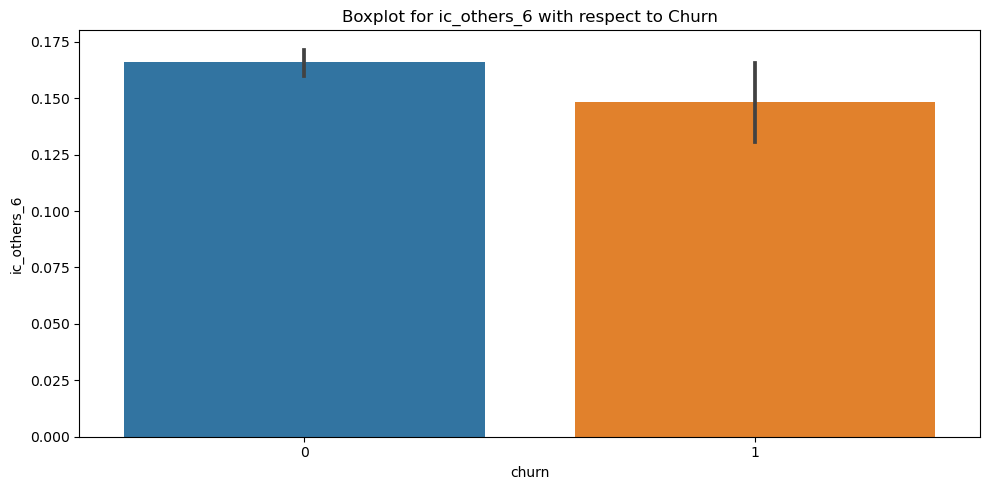

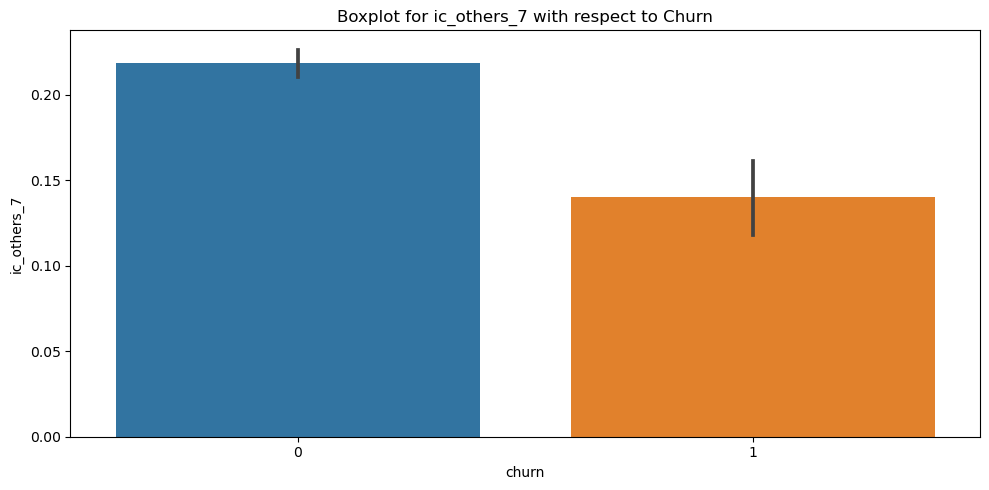

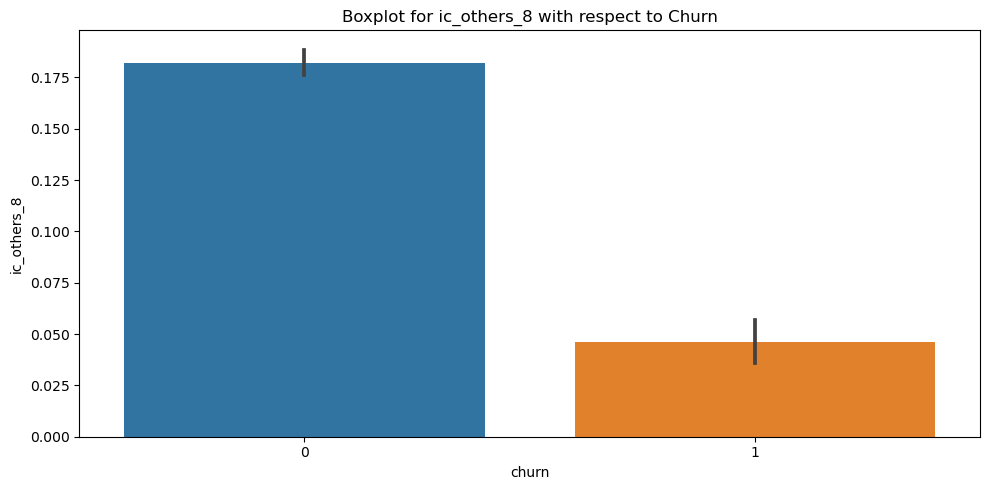

In [326]:
arpu_columns = data.columns[data.columns.str.contains('ic')]

# Loop through rech_columns
for i in arpu_columns:
    plt.figure(figsize=(10, 5))
    data_ct = data[data[i] <= data[i].quantile(0.95)]
    
    sns.barplot(x='churn', y=i, data=data_ct)
    
    plt.title(f'Boxplot for {i} with respect to Churn')
    plt.tight_layout()
    plt.show()

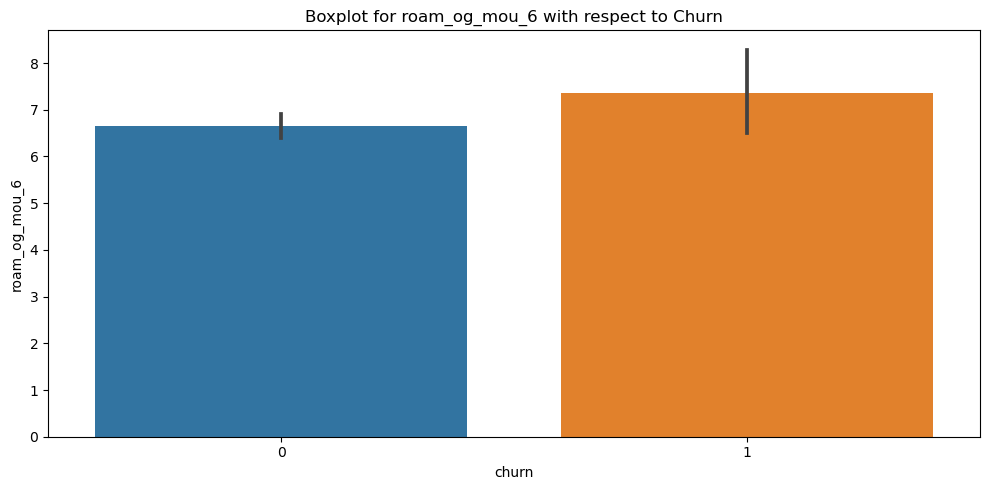

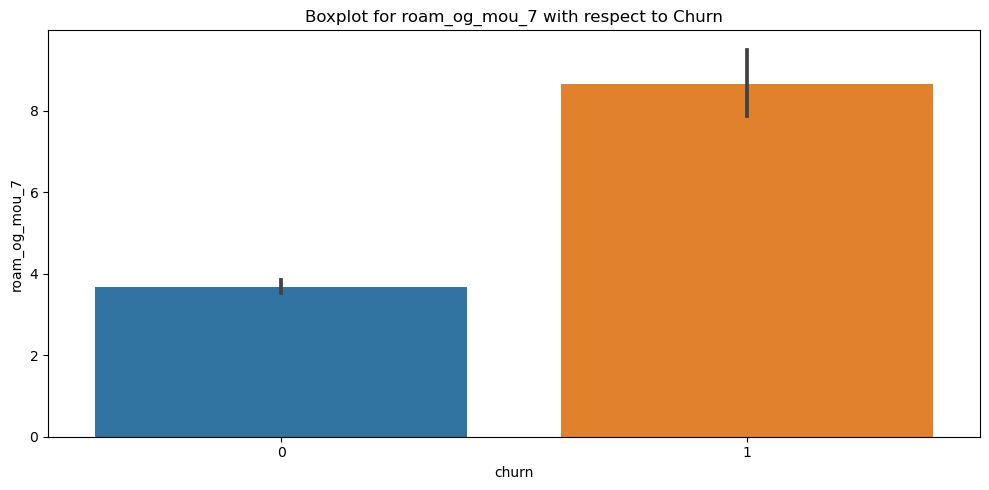

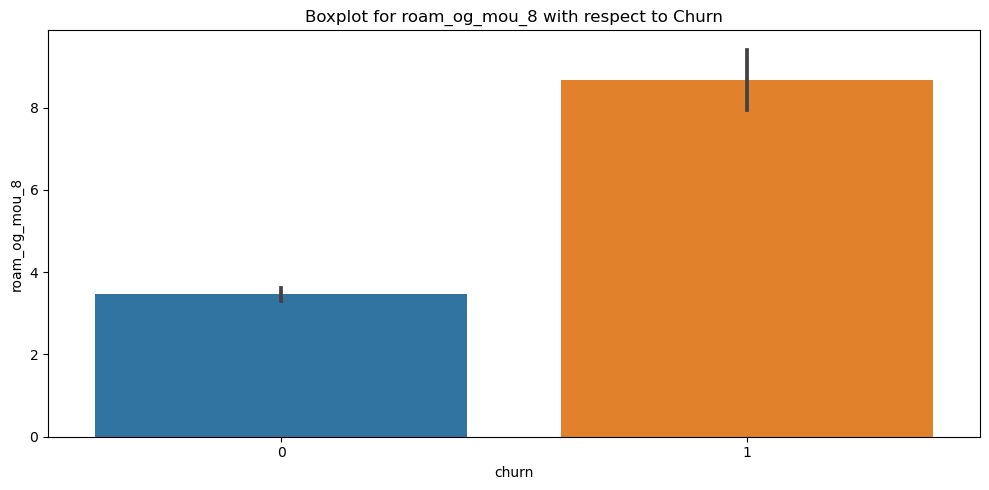

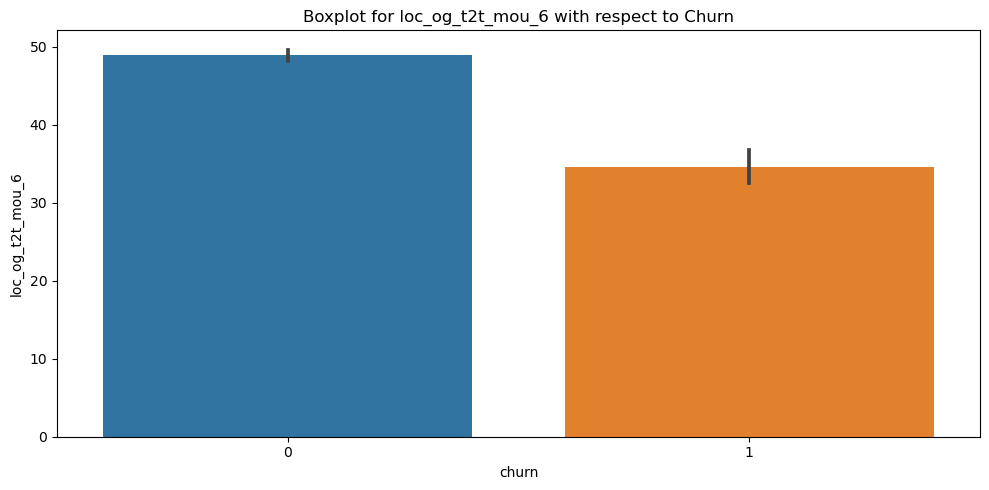

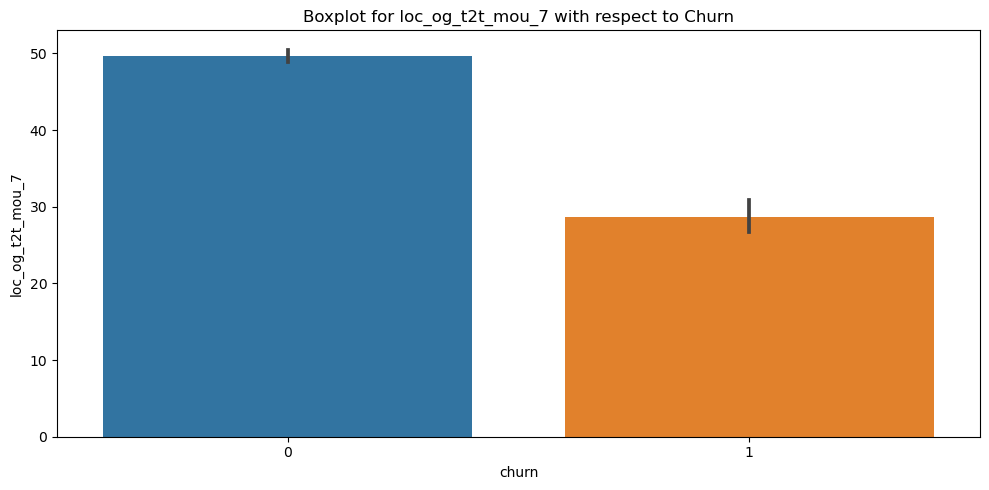

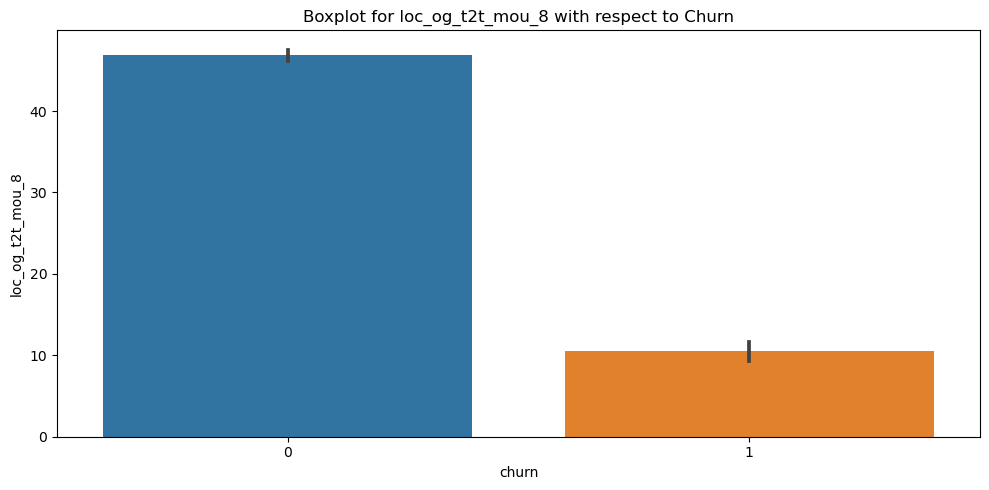

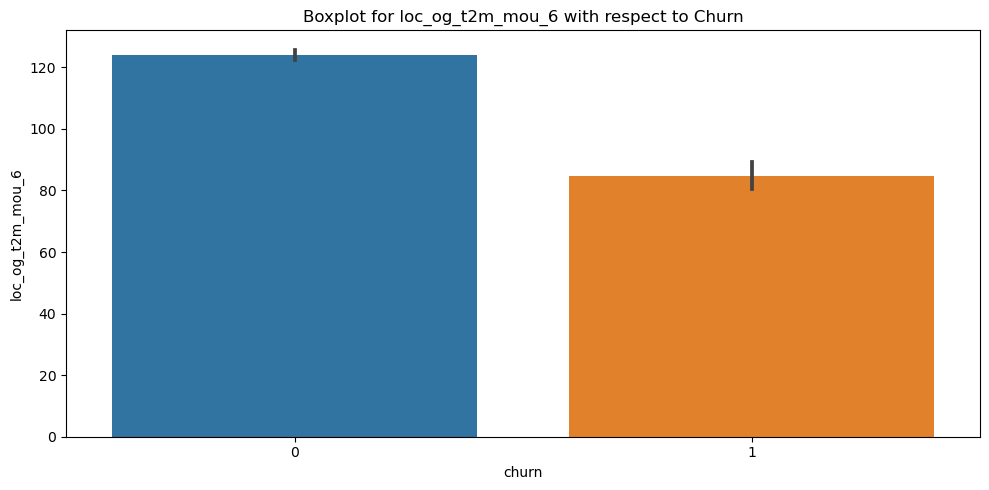

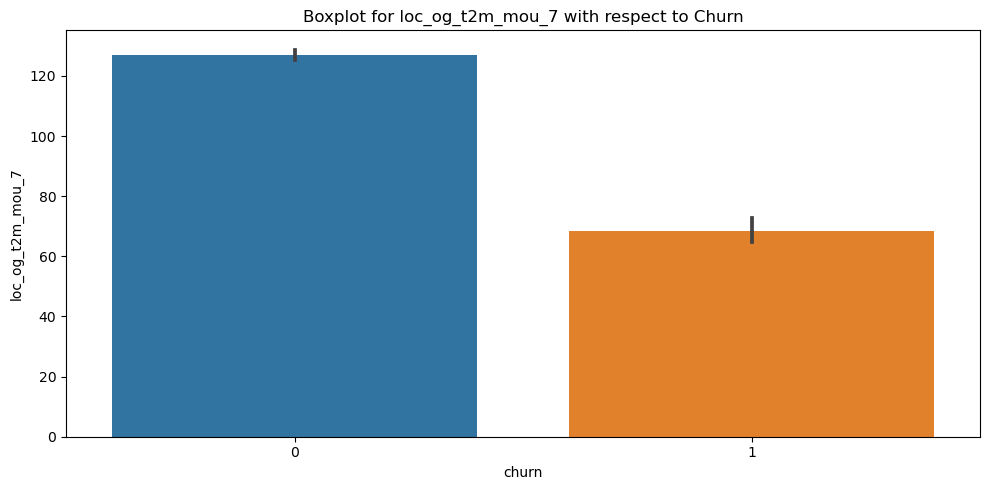

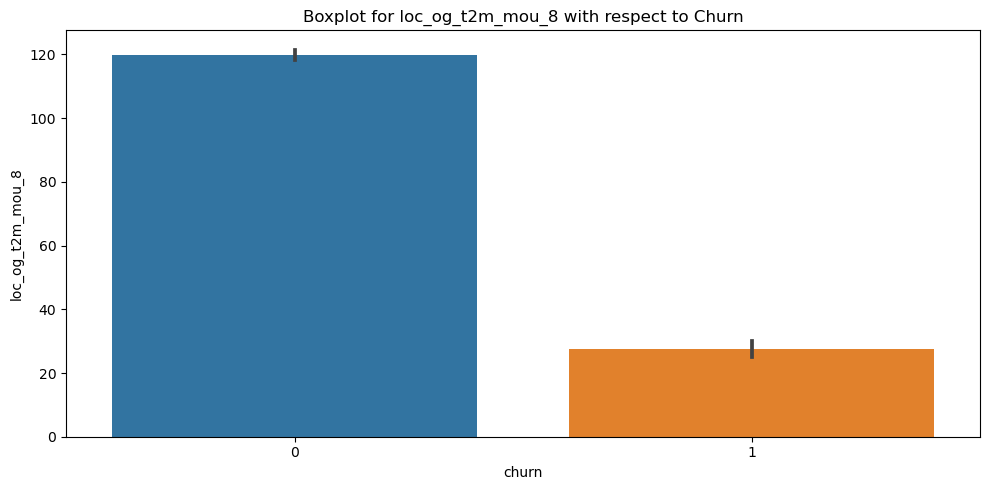

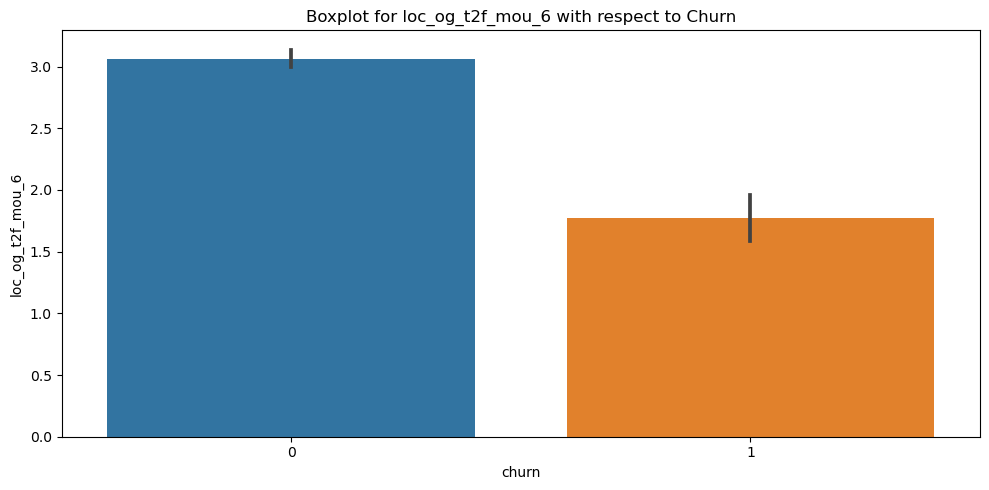

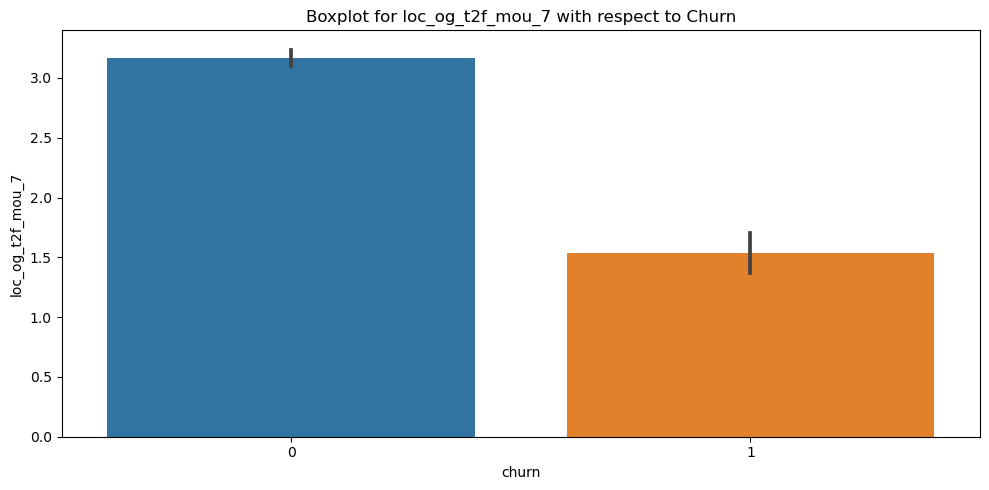

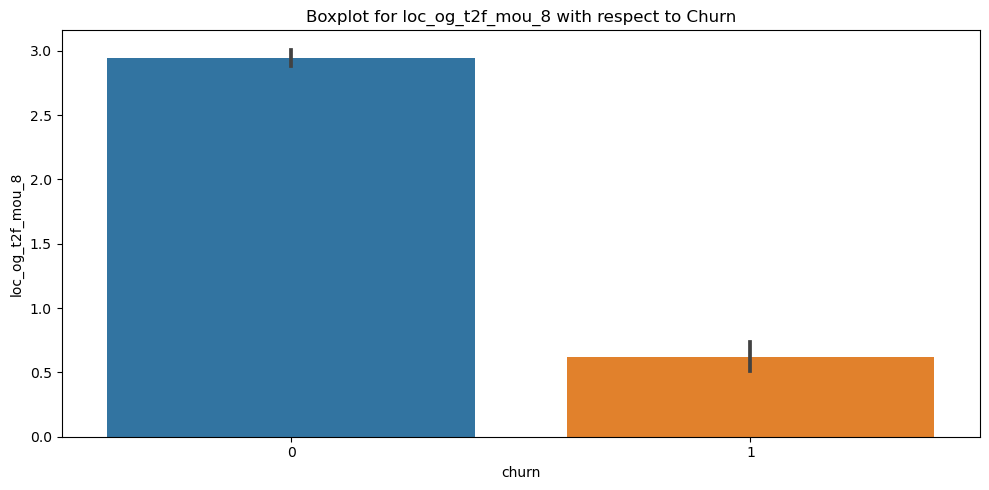

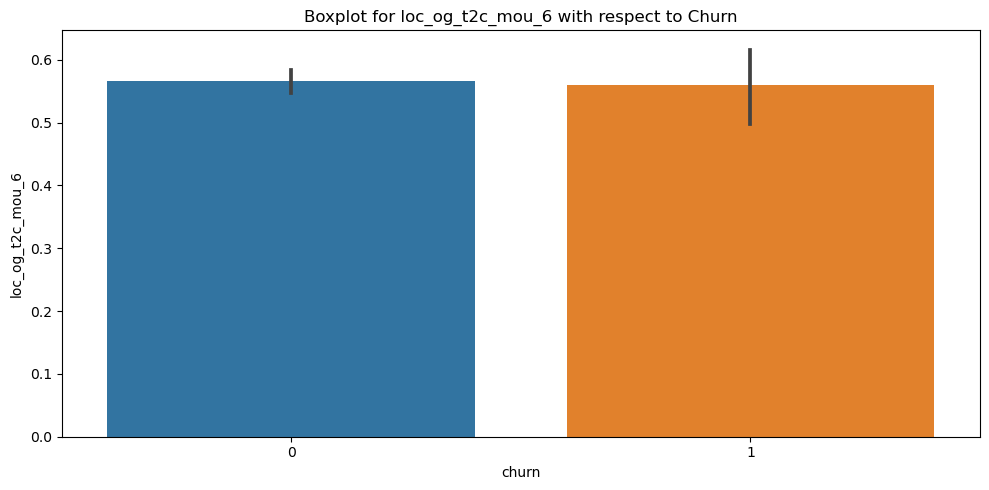

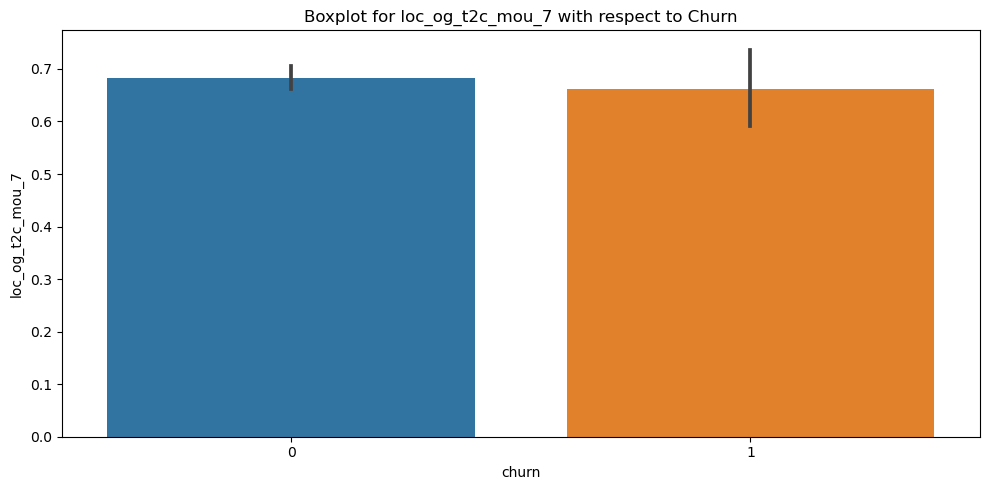

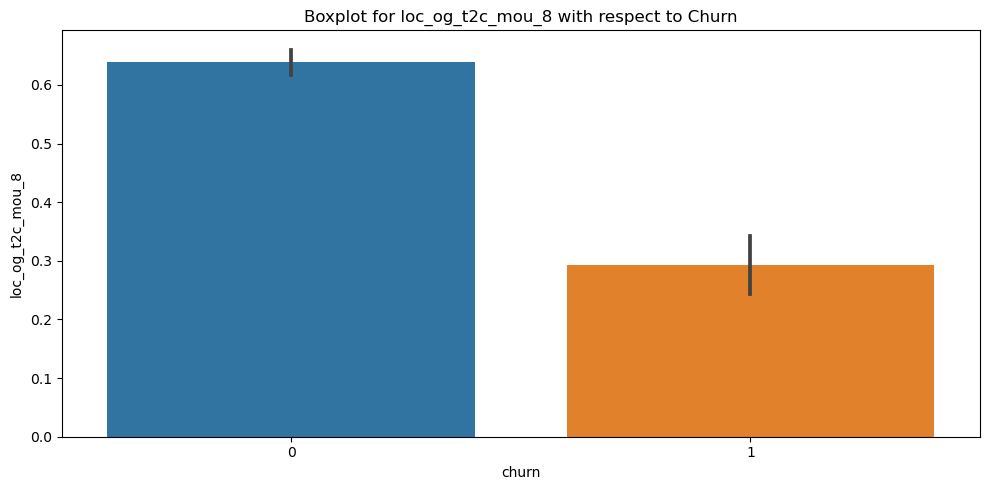

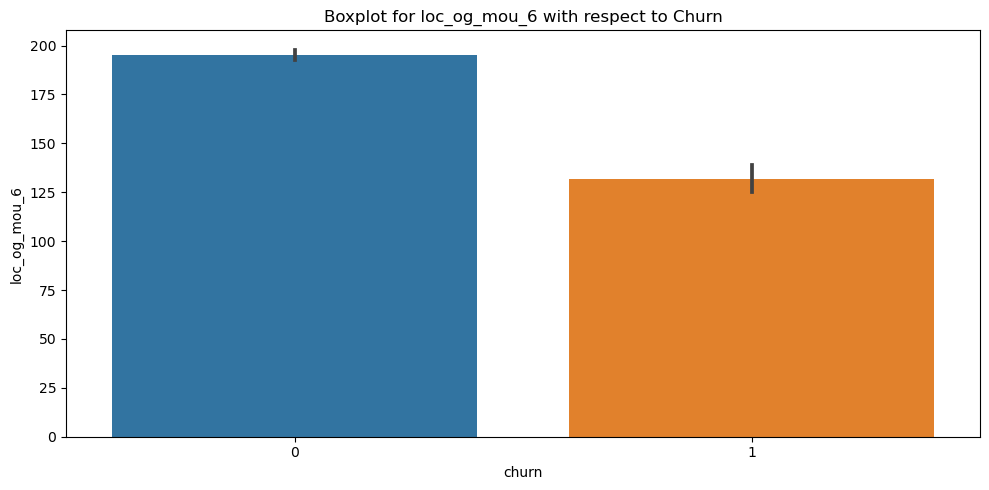

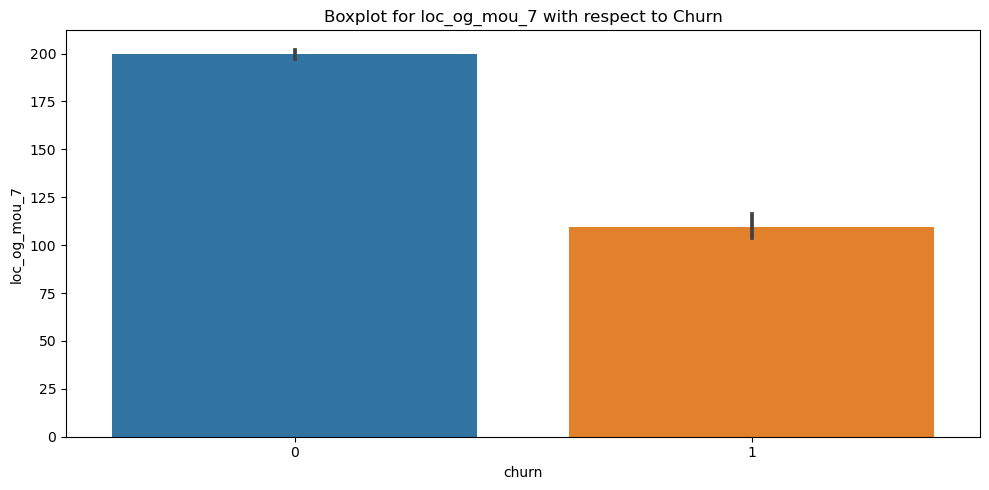

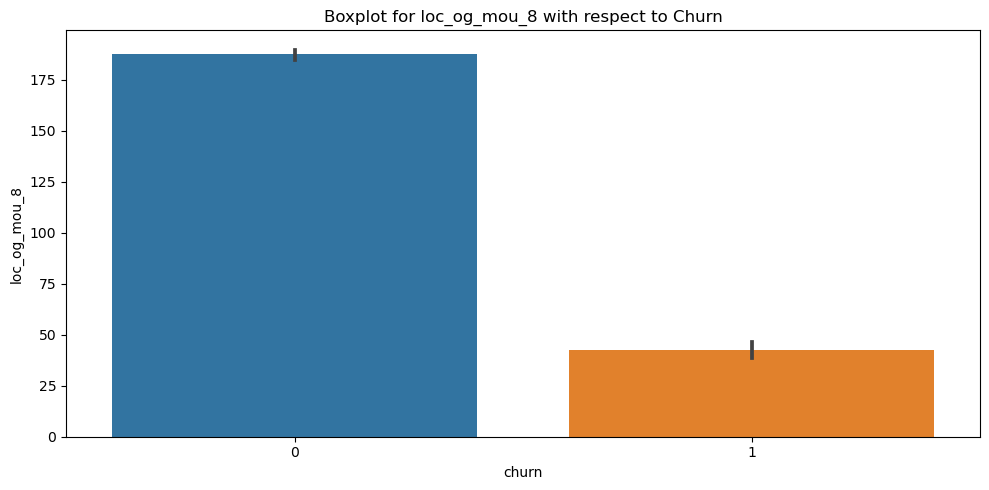

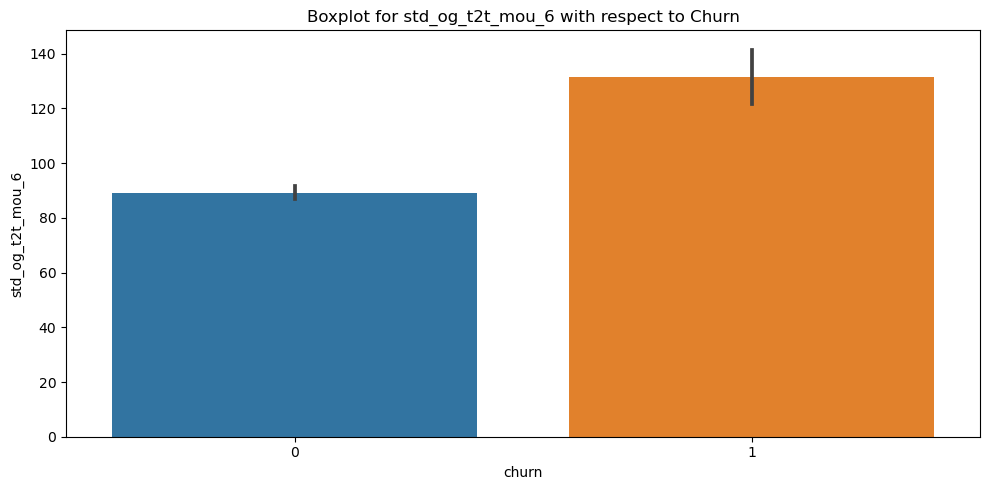

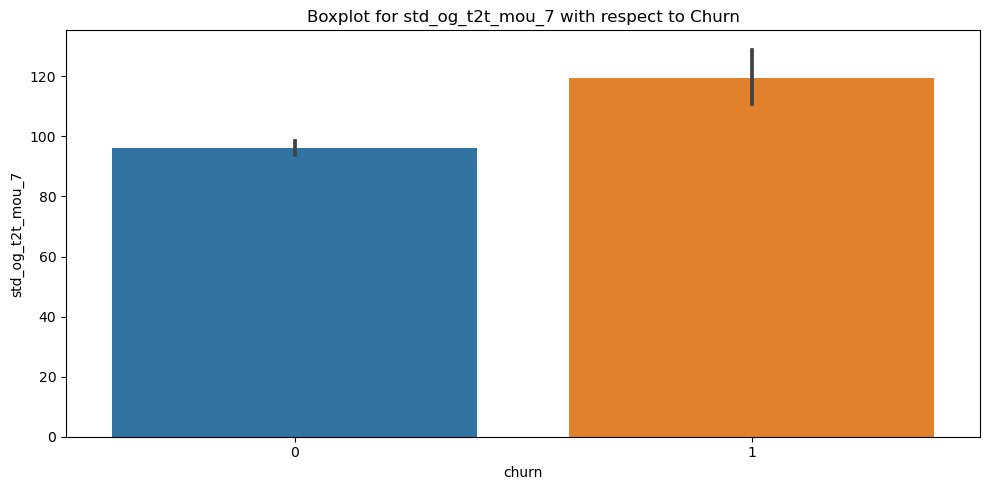

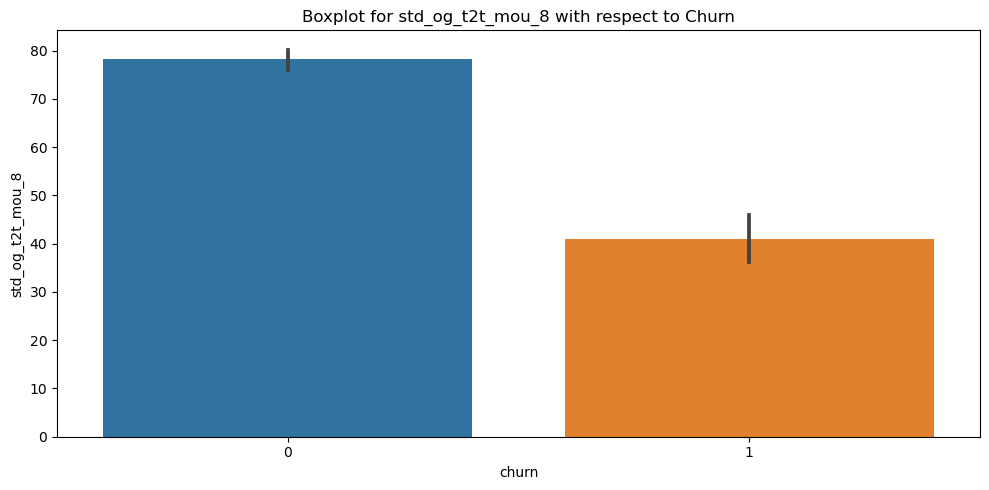

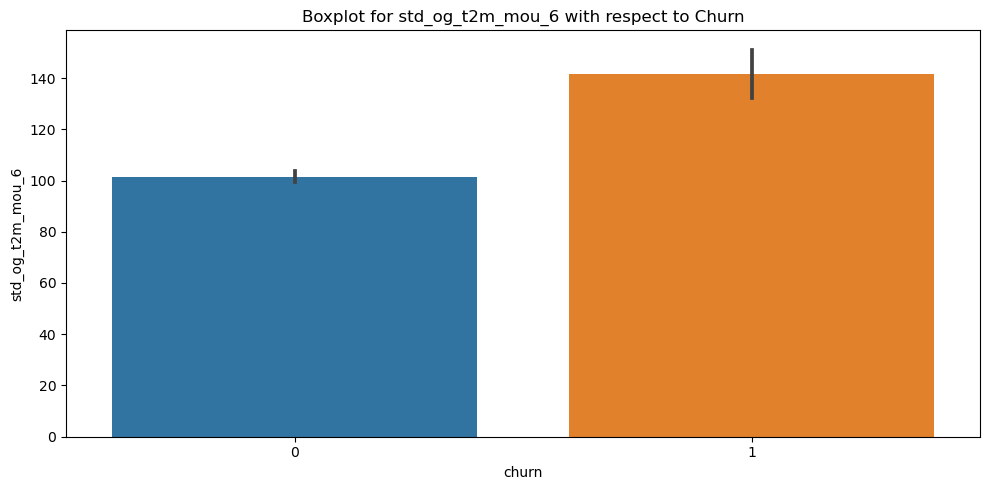

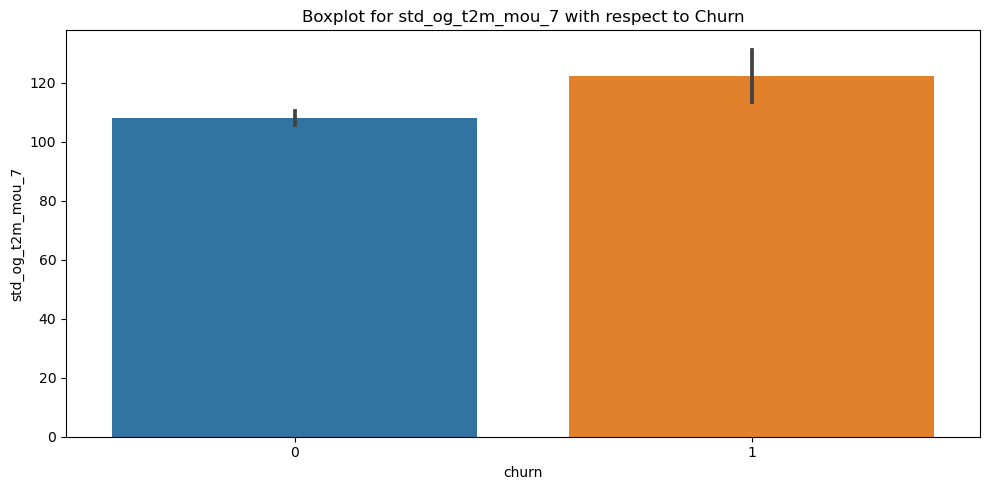

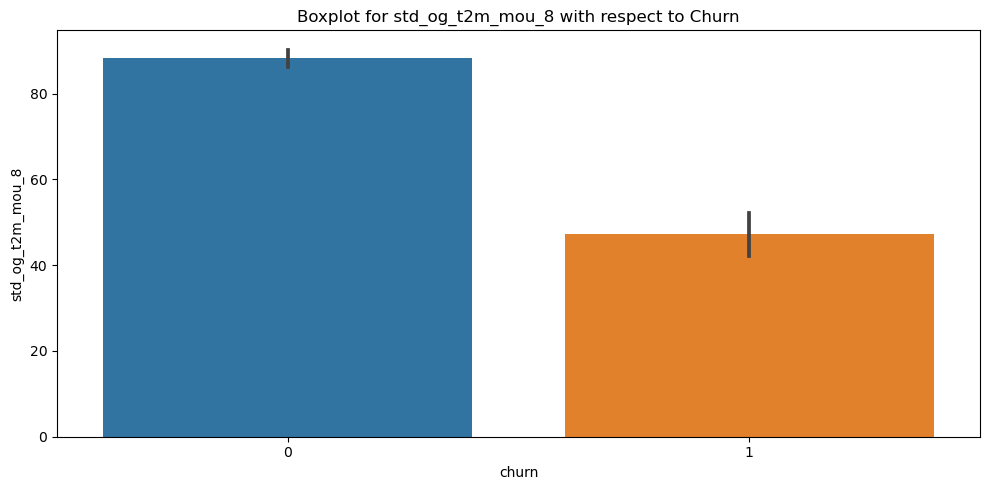

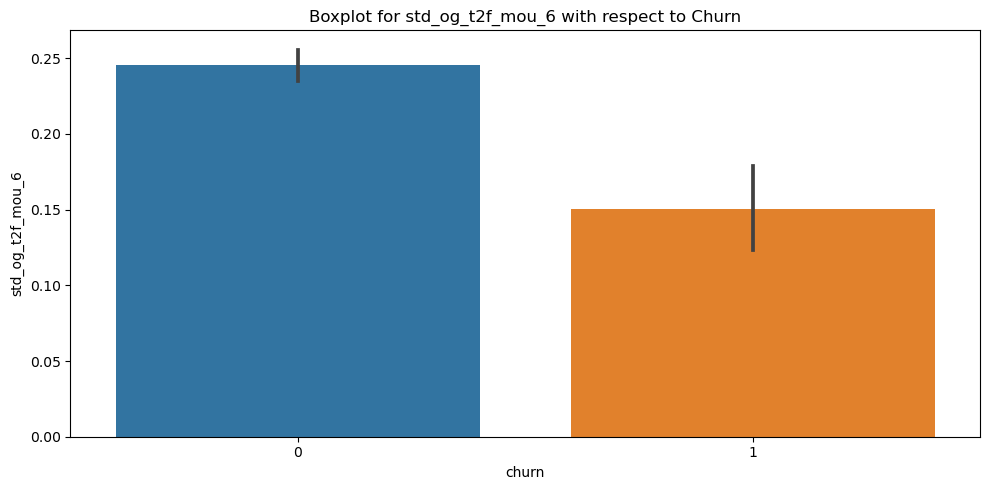

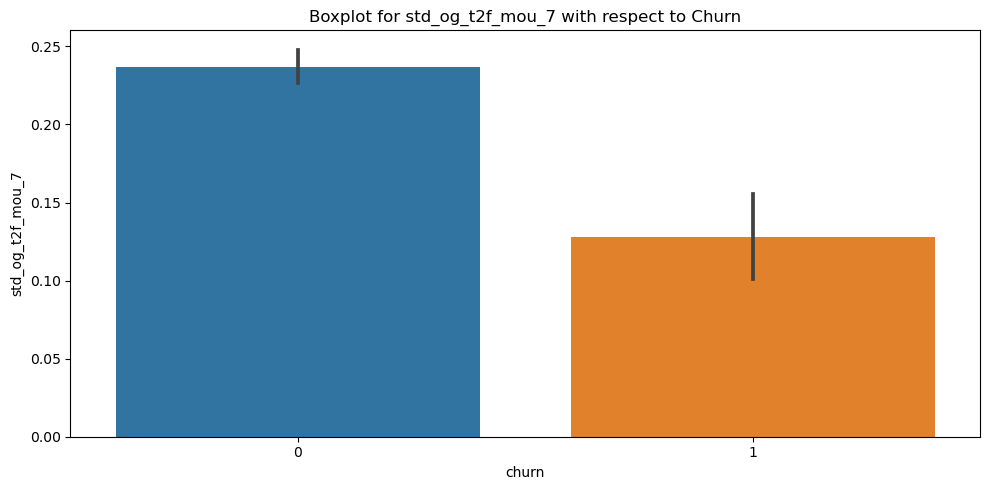

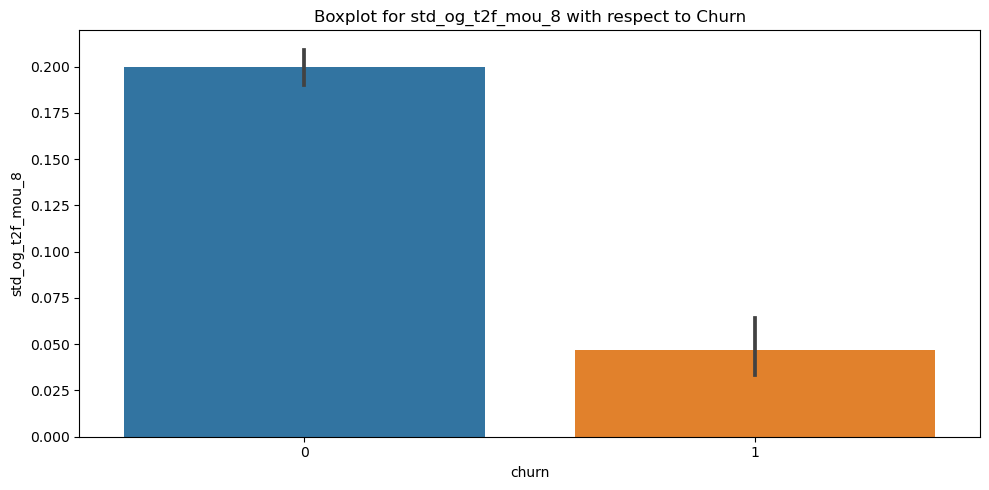

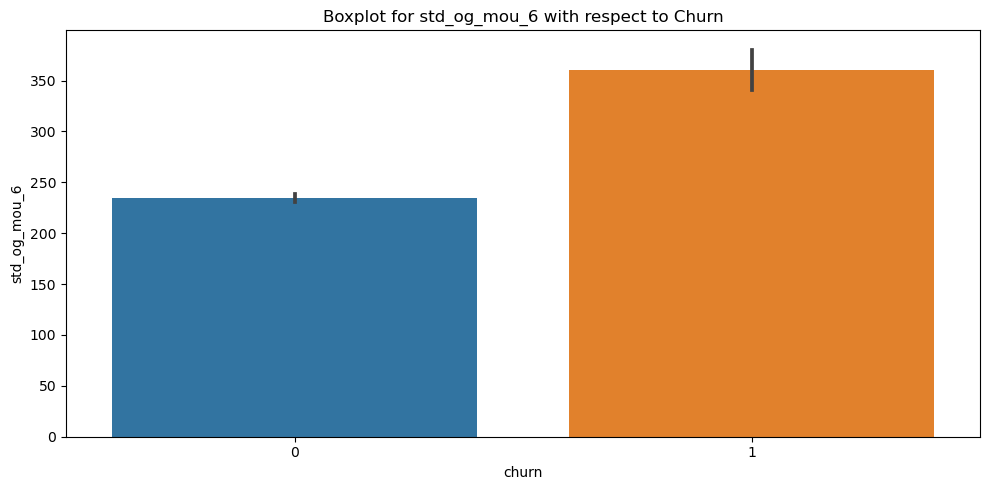

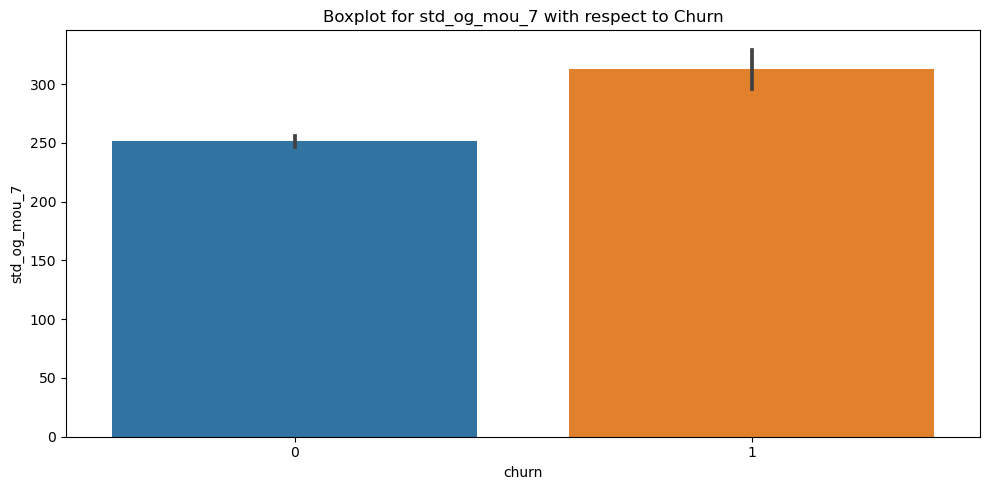

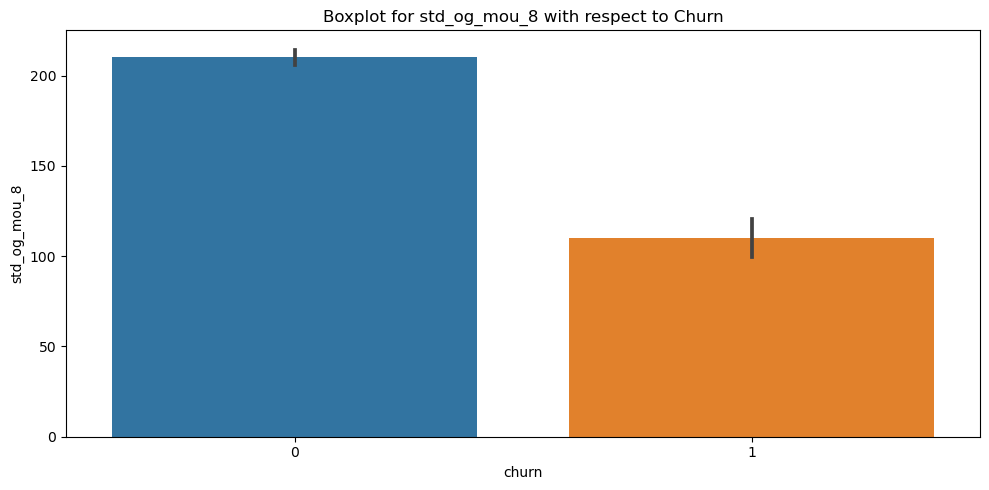

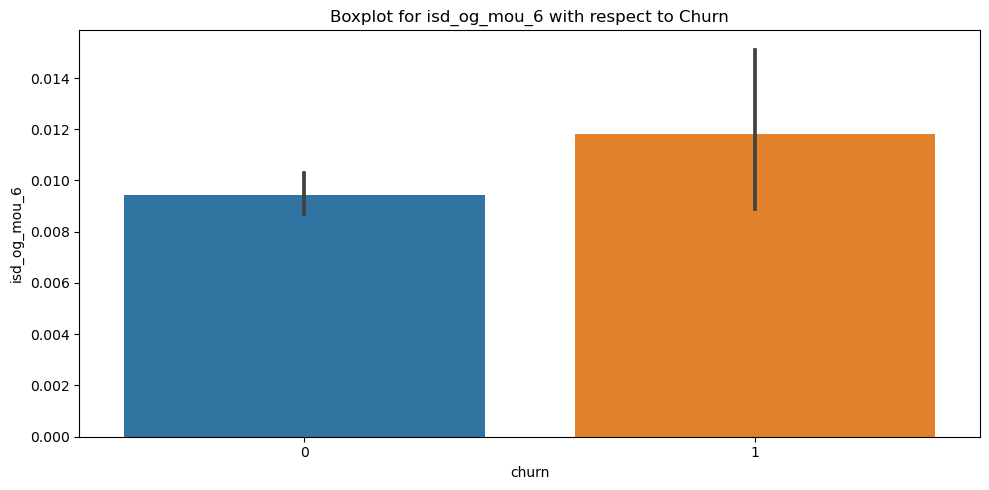

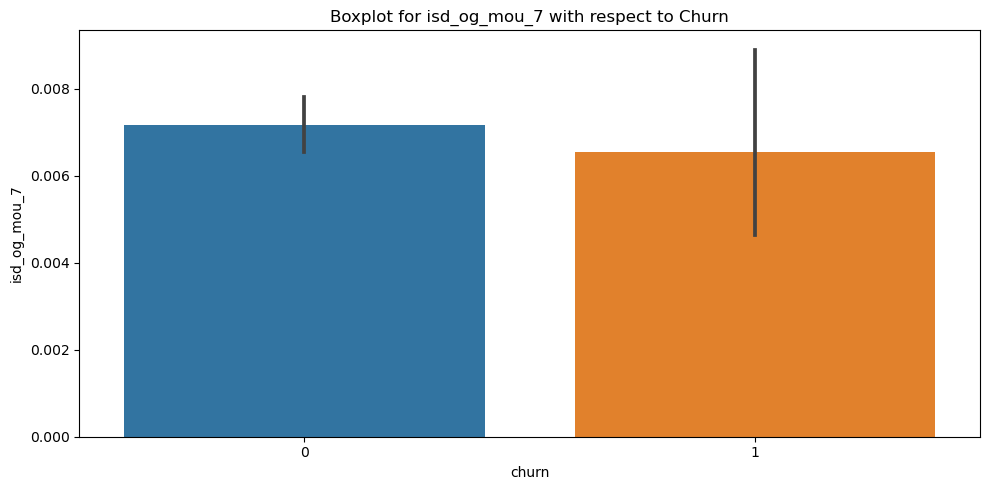

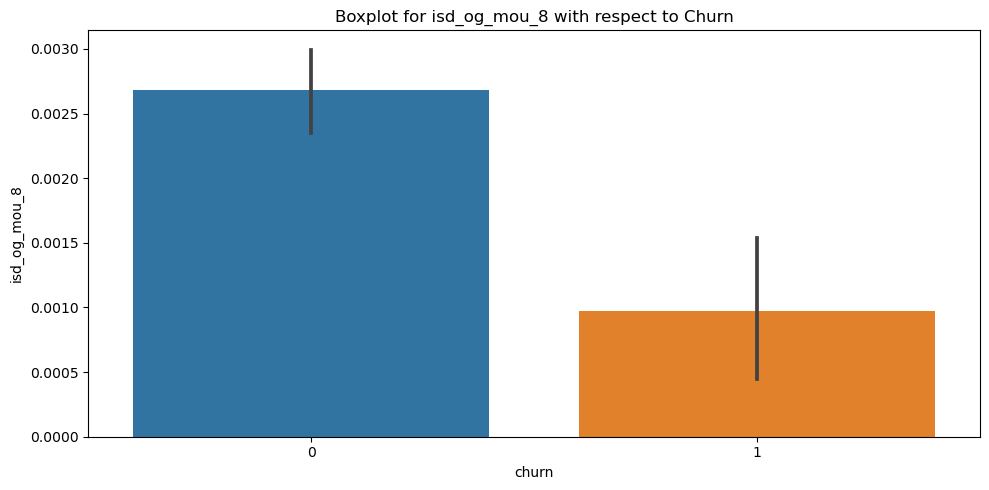

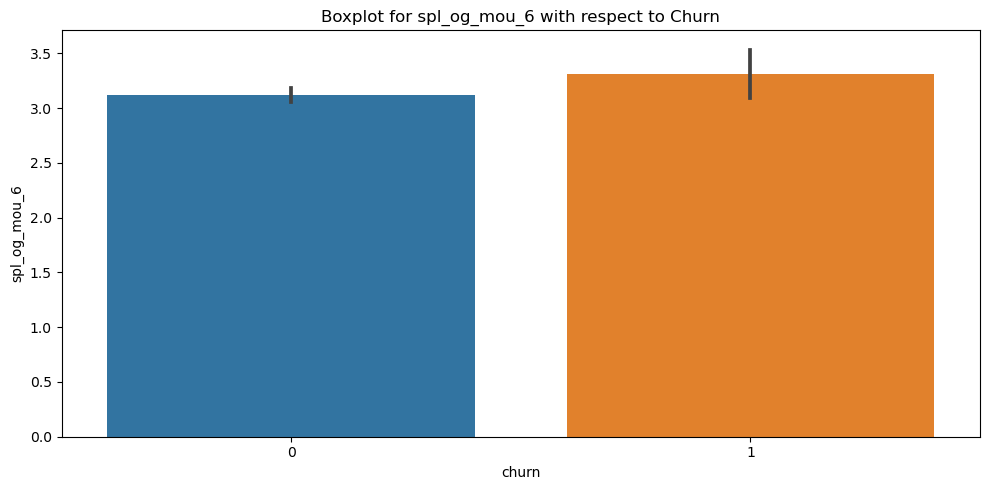

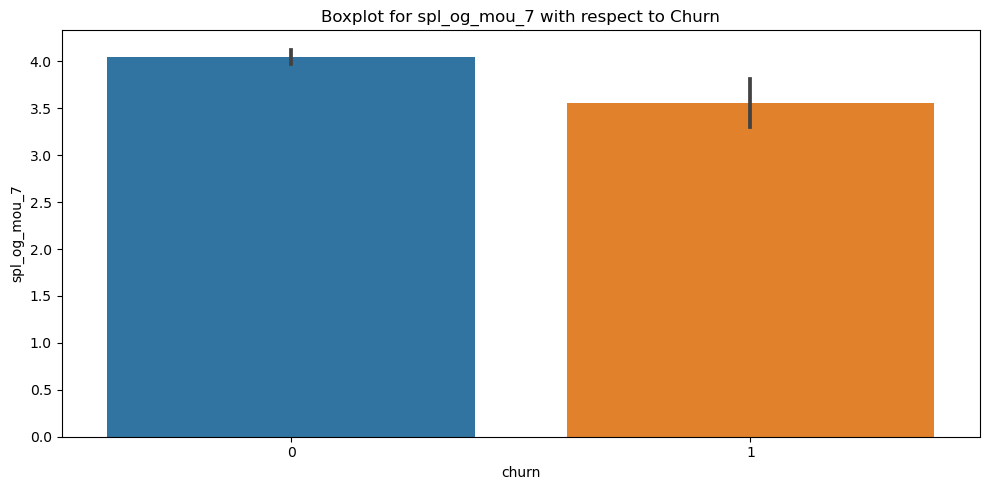

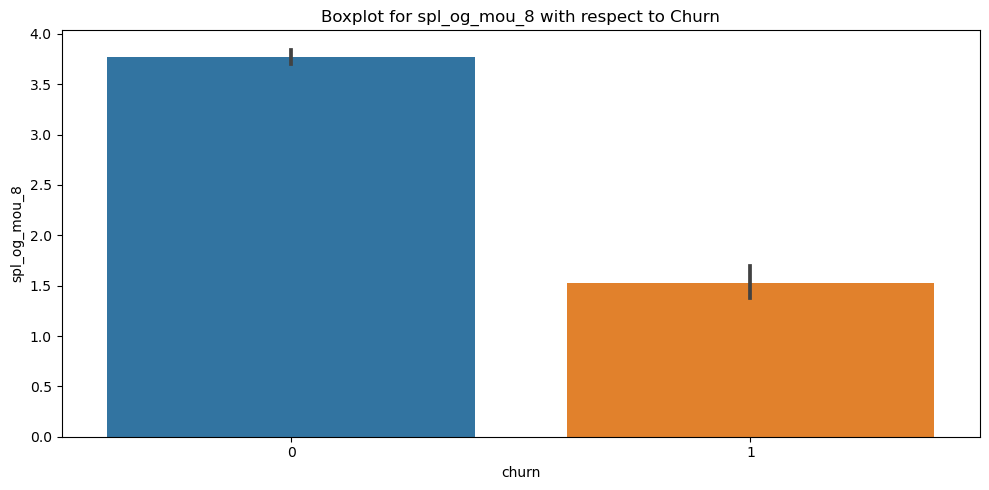

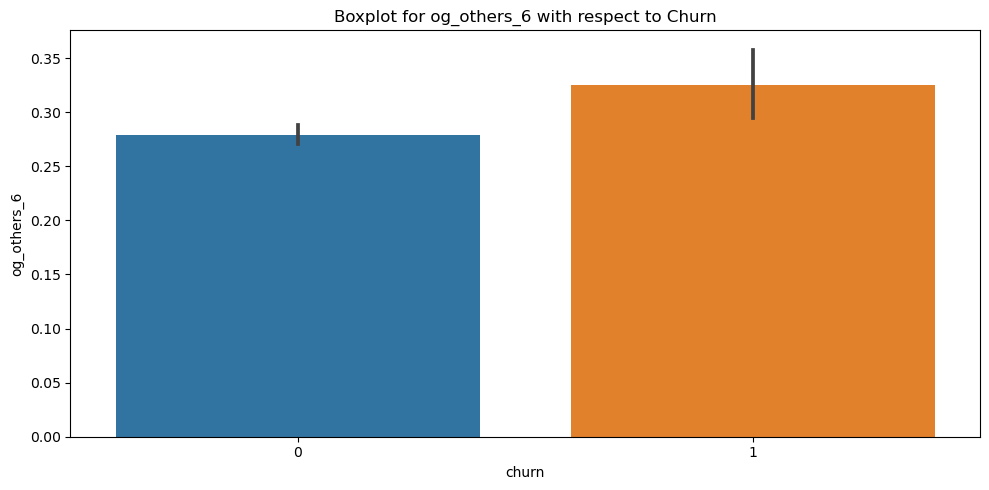

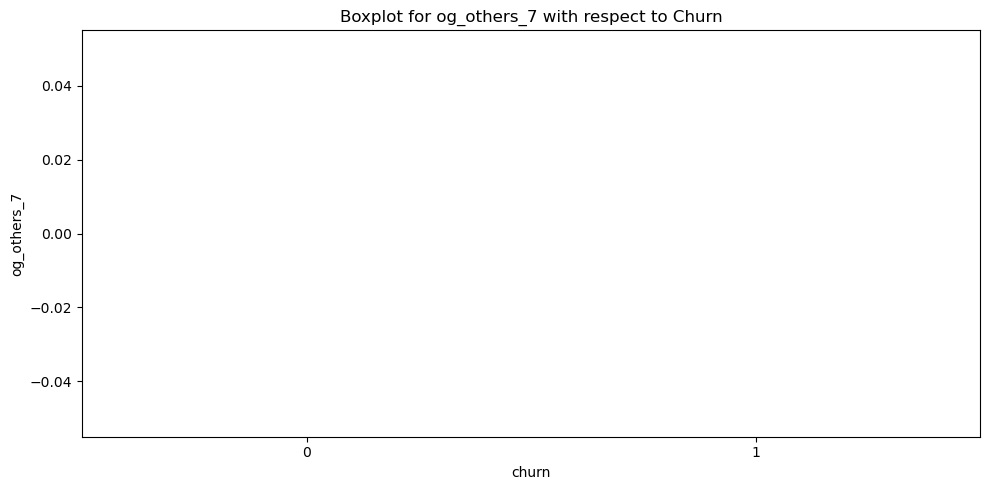

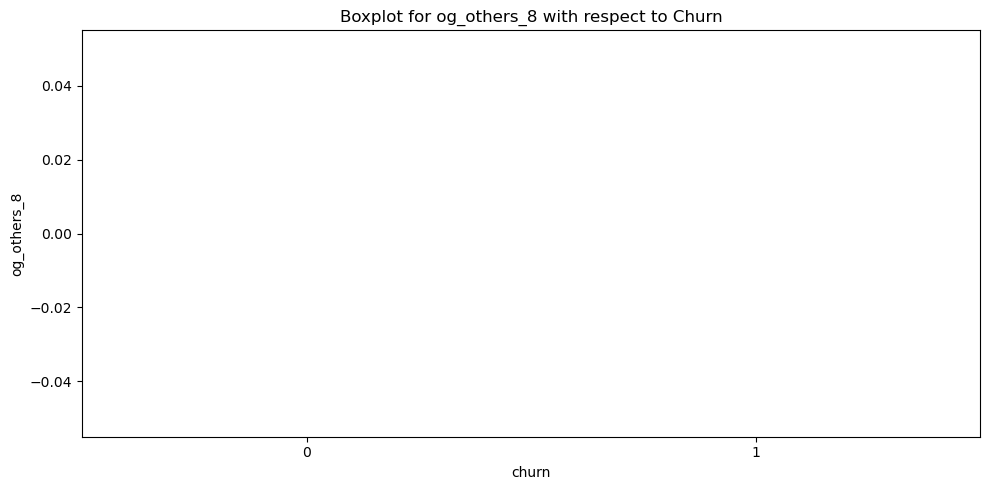

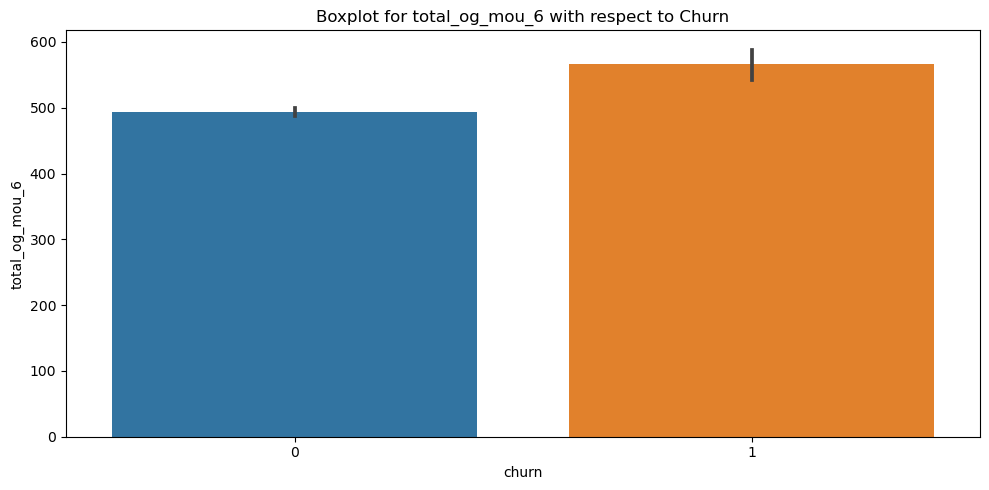

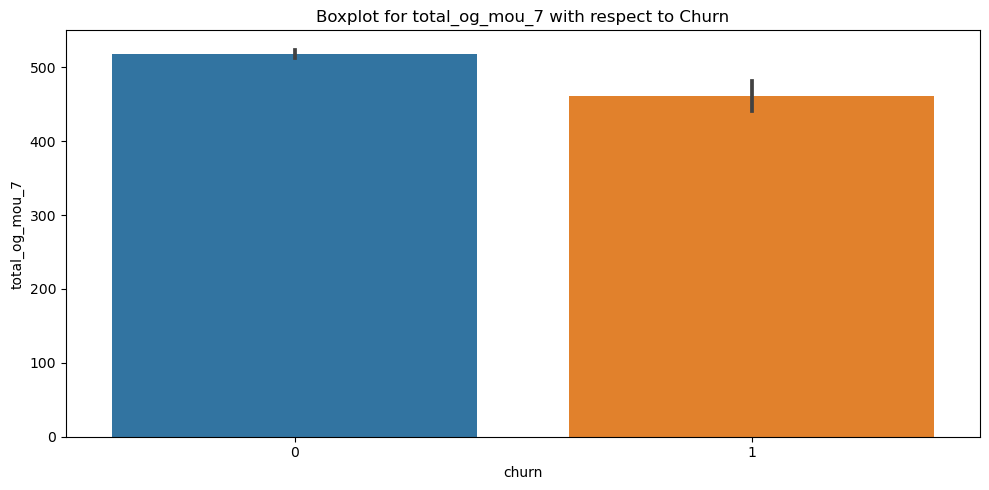

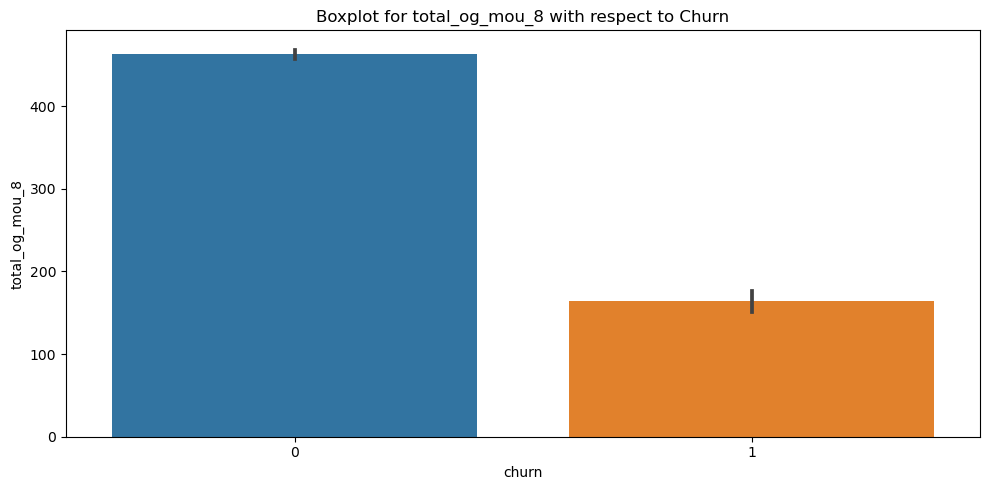

In [327]:
arpu_columns = data.columns[data.columns.str.contains('og')]

# Loop through rech_columns
for i in arpu_columns:
    plt.figure(figsize=(10, 5))
    data_ct = data[data[i] <= data[i].quantile(0.95)]
    
    sns.barplot(x='churn', y=i, data=data_ct)
    
    plt.title(f'Boxplot for {i} with respect to Churn')
    plt.tight_layout()
    plt.show()

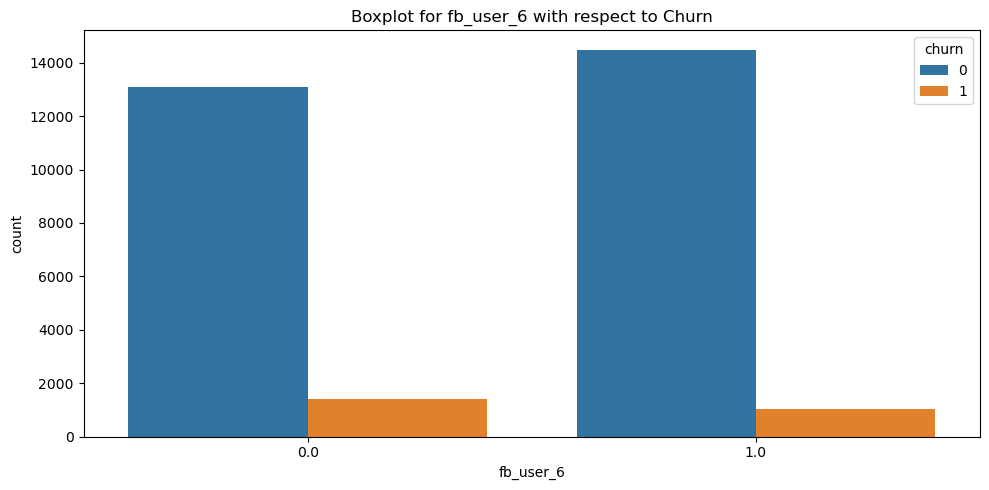

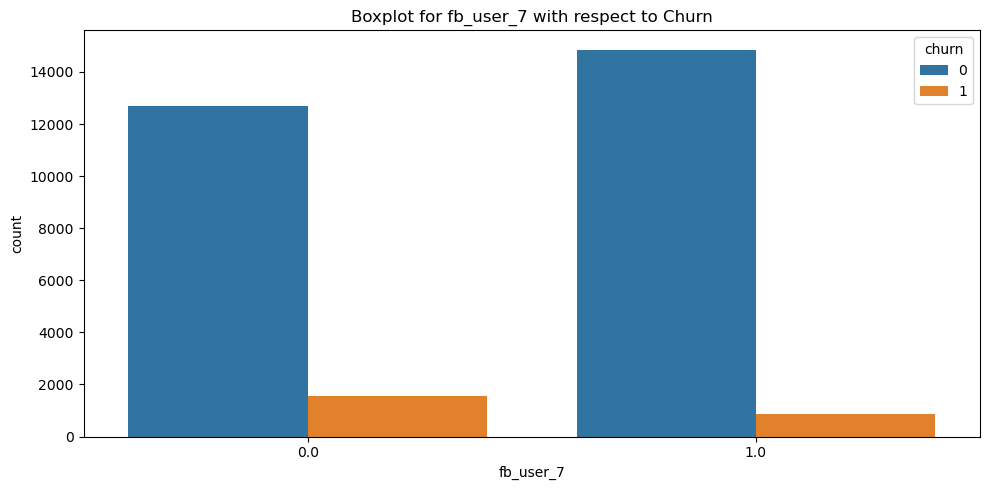

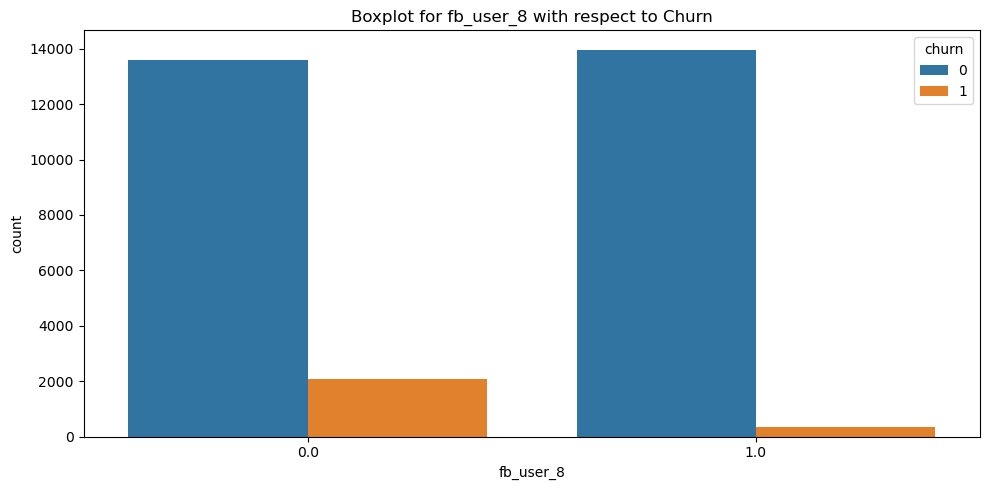

In [328]:
arpu_columns = data.columns[data.columns.str.contains('fb')]

# Loop through rech_columns
for i in arpu_columns:
    plt.figure(figsize=(10, 5))
    data_ct = data[data[i] <= data[i].quantile(0.95)]
    
    sns.countplot(x=i, data=data_ct,hue='churn')
    
    plt.title(f'Boxplot for {i} with respect to Churn')
    plt.tight_layout()
    plt.show()

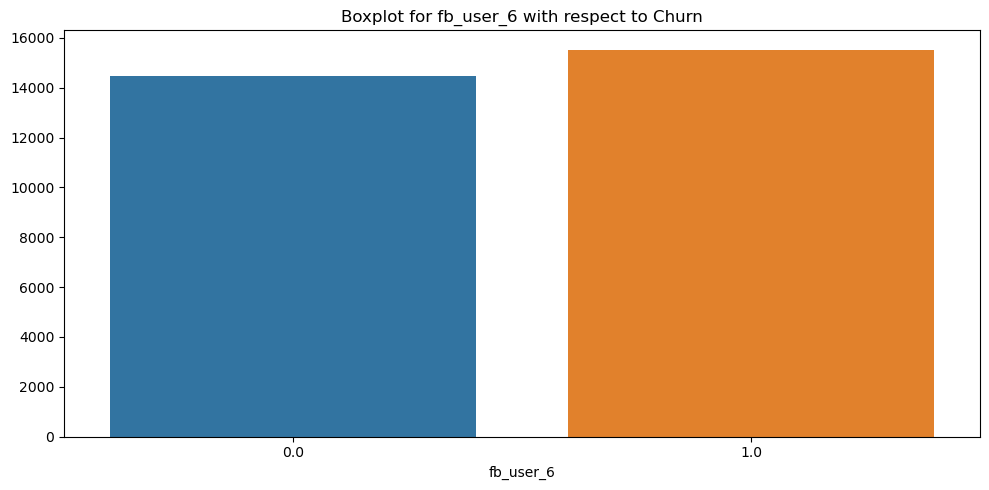

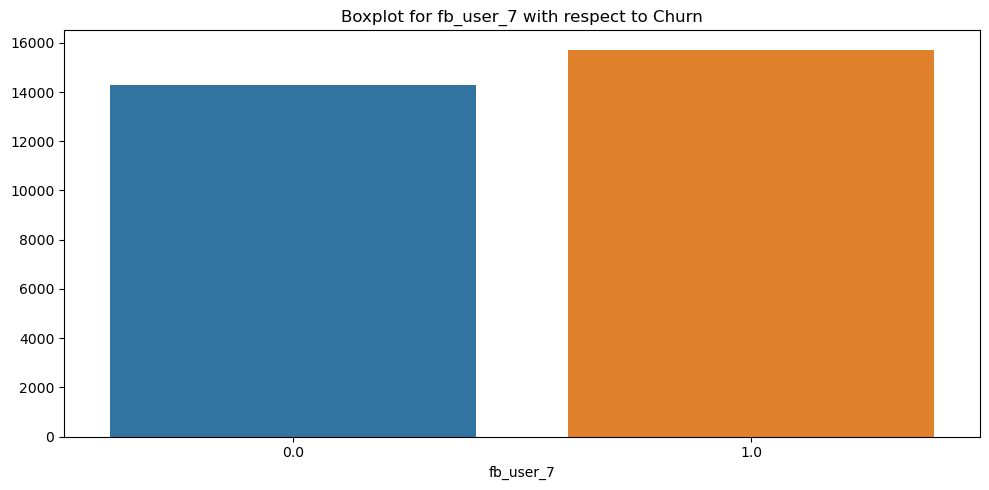

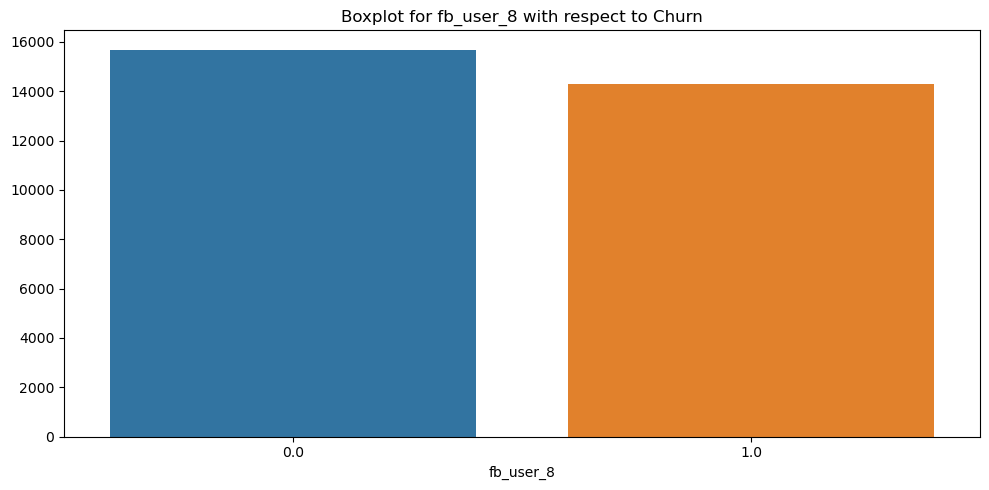

In [329]:
arpu_columns = data.columns[data.columns.str.contains('fb')]

# Loop through rech_columns
for i in arpu_columns:
    plt.figure(figsize=(10, 5))
    data_ct = data[data[i] <= data[i].quantile(0.95)]
    
    sns.barplot(x=data[i].value_counts().index,y=data[i].value_counts().values, data=data_ct)
    
    plt.title(f'Boxplot for {i} with respect to Churn')
    plt.tight_layout()
    plt.show()

In [330]:
raw_data['last_date_of_month_6']=pd.to_datetime(raw_data['last_date_of_month_6']).dt.day


In [331]:
raw_data['date_of_last_rech_6']=pd.to_datetime(raw_data['date_of_last_rech_6']).dt.day

<Axes: >

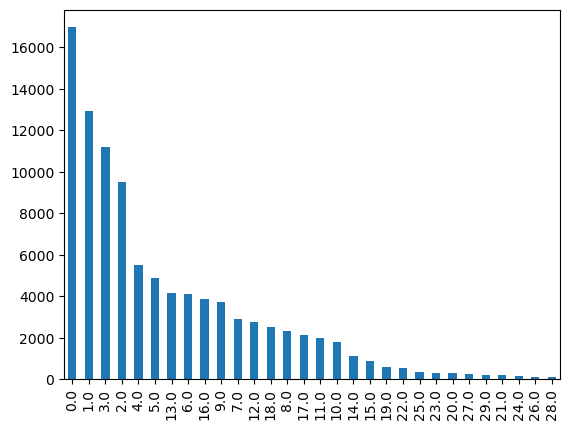

In [333]:
(raw_data['last_date_of_month_6']-raw_data['date_of_last_rech_6']).value_counts().plot.bar()


In [334]:
raw_data['last_date_of_month_6']-raw_data['date_of_last_rech_6'].value_counts()

0.0          NaN
1.0       -188.0
2.0        -79.0
3.0       -203.0
4.0       -101.0
           ...  
99994.0      NaN
99995.0      NaN
99996.0      NaN
99997.0      NaN
99998.0      NaN
Length: 99999, dtype: float64